#**Collect Data**

*   Padronize columns names
*   Merge the data in vehicle information(frota.csv)

*   Standardize textual values


In [ ]:
import os
import numpy as np
import pandas as pd
import re


##Fleet


In [ ]:
df_fleet = pd.read_csv('frota.csv')
df_fleet.head()

,Placa,Marca,Modelo,TIPO VEÍCULO,TIPO CARROCE,Depto.,Ano/Modelo,Capacidade,Aplicação,COLIGADA,PROPRIETÁRIO
0,GKC 2223,VW,GOL GVI,passeio,-,comercial,2017.0,-,VND,ANDRADINA,TUPA
1,BRY 8J68,VW,SAVEIRO ROBUST,pick up,ABERTA,comercial,2020.0,-,VND,ANDRADINA,TUPA
2,EDO 2491,VW,17180,toco,TANQUE,operacional,2011.0,NaN,ENTREGA DIESEL,ANDRADINA,ANDRADINA
3,EDO 1167,VW,GOL GIV,passeio,-,ADM,2010.0,-,CAD,ANDRADINA,ANDRADINA
4,EDO 2492,VW,17180,toco,TANQUE,operacional,2011.0,10000,ENTREGA DIESEL,ANDRADINA,ANDRADINA


In [ ]:
df_fleet.columns = map(str.lower,df_fleet.columns)

In [ ]:
#changing columns names
df_fleet.rename(columns={'tipo veiculos':'vehicle_type', 'tipo carroce':'truck_type', 
                         'marca':'brand_name','modelo':'model', 'tipo veículo': 'vehicle_type', 
                         'capacidade':'capacity', 'depto.': 'department','placa':'license', 
                         'ano/modelo': 'model_year','coligada':'afiliate_name',
                         'aplicação':'aplication', 'proprietário':'property_owner'},inplace=True)

In [ ]:
df_fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   license         417 non-null    object 
 1   brand_name      416 non-null    object 
 2   model           415 non-null    object 
 3   vehicle_type    415 non-null    object 
 4   truck_type      414 non-null    object 
 5   department      416 non-null    object 
 6   model_year      410 non-null    float64
 7   capacity        407 non-null    object 
 8   aplication      416 non-null    object 
 9   afiliate_name   413 non-null    object 
 10  property_owner  411 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.0+ KB


In [ ]:
len(df_fleet['license'].unique())

414

In [ ]:
df_fleet.shape

(417, 11)

In [ ]:
df_fleet['afiliate_name'].unique()

array(['ANDRADINA', 'ARAÇATUBA', 'ARAUCÁRIA', 'ARAUCÁRIA ', 'BATAGUASSU',
       nan, 'BAURU', 'CAMPO GRANDE', 'CASCAVEL', 'DEVOLVIDO ',
       'DEVOLVIOD', 'DOURADOS', 'FAZENDA MS', 'GUARAPUAVA', 'LONDRINA',
       'MARILIA', 'MARINGA', 'NAVIRAI', 'NOVA ANDRADINA', 'OURINHOS',
       'PARADO/TUPA', 'PARANAIBA', 'PARANAÍBA', 'PAULINIA', 'PRUDENTE',
       'SUMARÉ', 'TRANSPORTADORA', 'TRES LAGOAS', 'TUPA', 'TUPA ',
       'TUPA / PATIO', 'VENDIDO', 'VENDIDO '], dtype=object)

In [ ]:
df_fleet['brand_name'].unique()

array(['VW', 'VOLVO', 'RECROSUL', 'RANDON', 'NOMA', 'SCANIA', 'HONDA',
       'UP', 'FORD', 'M.BENZ', 'FACCHINI', 'CITROEN', 'CHEVROLET',
       'HYUNDAI', 'KIA', 'NOMA ', 'RENAULT', 'MITSUBISHI', 'TOYOTA', 'MB',
       'PEUGEOT', 'MB ', 'IVECO', 'FIAT', 'SUNDOW', 'BLAYA', 'GM',
       'LIBRELATO', 'RHODOSS', 'MITISUBISHI', 'KRONORTE', nan],
      dtype=object)

##**Revenues 2020**


In [ ]:
df_revenues20 = pd.read_csv("faturamento_2020_limpos.csv")

In [ ]:
df_revenues20.columns = map(str.lower,df_revenues20.columns)

In [ ]:
#changing columns names 
df_revenues20.rename(columns={'codigo_filial':'branch_name','nf__placa':'license',
                              'grupo_produto__codigo':'product_code','grupo_produto__descricao': 'product_group_descpription', '1item_nf_0':'iv_item_10',
                              'grade total':'total'},inplace=True)

In [ ]:
df_revenues20.head()

,branch_name,license,product_code,product_group_descpription,item_nf_1,item_nf_2,item_nf_3,item_nf_4,item_nf_5,item_nf_6,item_nf_7,item_nf_8,item_nf_9,iv_item_10,item_nf_11,item_nf_12,grande total
0,02 - UNIPETRO - AD,BLB0901,6.0,LUBRIFICANTES,NaN,720.0,NaN,NaN,1420.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN,3080.0
1,02 - UNIPETRO - AD,BLB0901,50.0,OUTROS PRODUTOS P/REVENDA,NaN,NaN,NaN,NaN,800.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0
2,02 - UNIPETRO - AD,BLB0903,6.0,LUBRIFICANTES,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0
3,02 - UNIPETRO - AD,BLB0903,50.0,OUTROS PRODUTOS P/REVENDA,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
4,02 - UNIPETRO - AD,BLK5269,6.0,LUBRIFICANTES,NaN,NaN,NaN,NaN,NaN,372.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0


In [ ]:
df_revenues20['license'] = df_revenues20['license'].str.replace(' ','')

In [ ]:
df_revenues20['product_group_descpription'].unique()

array(['LUBRIFICANTES', 'OUTROS PRODUTOS P/REVENDA', 'OLEO DIESEL',
       'ATIVO - TANQUE/BOMBA/FILTRO', 'MATERIAL DE CONSUMO', 'UREIA'],
      dtype=object)

##**Fleet expenses**

In [ ]:
#fleet spends
df_fleetSpend20 = pd.read_csv('gastos_frota.csv')
df_fleetSpend20.shape

(18884, 11)

In [ ]:
df_fleetSpend20.head(2)

,NOME_FILIAL,VEICULO_PLACA,PLANO_CONTA__DESCRICAO,DATA,DOCUMENTO,MOVIMENTO__FORNECEDOR,CENTRO_CUSTO__CODIGO,CENTRO_CUSTO__DESCRICAO,PRODUTO_DESCRICAO,QUANTIDADE,TOTAL
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0


In [ ]:
#changing columns names 
df_fleetSpend20.rename(columns={'NOME_FILIAL':'branch_name','VEICULO_PLACA':'license',
                              'PLANO_CONTA__DESCRICAO':'area_description','DATA':'date','DOCUMENTO':'document',
                              'CENTRO_CUSTO__DESCRICAO':'tax_description','PRODUTO_DESCRICAO':'product_description',
                              'MOVIMENTO__FORNECEDOR':'supplier','CENTRO_CUSTO__CODIGO':'tax_code',
                              'QUANTIDADE':'quantity','TOTAL':'total'},inplace=True)

In [ ]:
df_fleetSpend20.head()

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0
2,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,30/01/2020,102.0,ANDERSON BONATO ALTRAN,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,1220.0
3,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,31/03/2020,339.0,MITSUHARU MISU EIRELI,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,535.0
4,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,01/07/2020,22919.0,MARIA CELINA DO CARMO BASAGLIA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,350.0



##**Fleet Spends 2021**

In [ ]:
df_fleetSpends21 = pd.read_csv('gastos_frota_2021.csv')
df_fleetSpends21.shape

(36112, 11)

In [ ]:
df_fleetSpends21.head()

,NOME_FILIAL,VEICULO_PLACA,PLANO_CONTA__DESCRICAO,DATA,DOCUMENTO,MOVIMENTO__FORNECEDOR,CENTRO_CUSTO__CODIGO,CENTRO_CUSTO__DESCRICAO,PRODUTO_DESCRICAO,QUANTIDADE,TOTAL
0,UNIPETRO - AD,BJQ2825,MANUTENCAO GERAL DO VEICULOS,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.00
1,UNIPETRO - AD,BJQ2825,MANUTENCAO GERAL DO VEICULOS,05/03/2021,1909.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,140.00
2,UNIPETRO - AD,BJQ2825,MANUTENCAO GERAL DO VEICULOS Total,27/04/2021,10686.0,RODA LIVRE ACESSORIOS P CAMINHOES LTDA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,80.00
3,UNIPETRO - AD,BJQ2825,MANUTENCAO GERAL DO VEICULOS Total,27/04/2021,50774.0,RODA LIVRE ACESSORIOS P CAMINHOES LTDA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,85.0,391.49
4,UNIPETRO - AD,BJQ2825,MANUTENCAO GERAL DO VEICULOS Total,27/04/2021 Total,50774.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,86.0,471.49


In [ ]:
df_fleetSpends21.rename(columns={'NOME_FILIAL':'branch_name', 'VEICULO_PLACA':'license',
                              'PLANO_CONTA__DESCRICAO':'area_description','DATA':'date','DOCUMENTO':'document',
                              'CENTRO_CUSTO__DESCRICAO':'tax_description','PRODUTO_DESCRICAO':'product_description',
                              'MOVIMENTO__FORNECEDOR':'supplier','CENTRO_CUSTO__CODIGO':'tax_code',
                              'QUANTIDADE':'quantity','TOTAL':'total'},inplace=True)

In [ ]:
#delete lines with word total
regex=".*Total"
df_fleetSpends21=df_fleetSpends21[~df_fleetSpends21["license"].str.contains(regex)]
df_fleetSpends21=df_fleetSpends21[~df_fleetSpends21["branch_name"].str.contains(regex)]
df_fleetSpends21.shape

(35513, 11)

##**Concatenate the databases**

In [ ]:
#concatenating the two expense bases
df_fleetSpend = df_fleetSpend20.append(df_fleetSpends21)
df_fleetSpend.head(2)


,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0


In [ ]:
df_fleetSpend.shape

(54397, 11)

##**KM Expenses**

In [ ]:
df_expensesKM = pd.read_csv('gastos_km_limpo.csv')

In [ ]:
df_expensesKM.columns=map(str.lower,df_expensesKM.columns)

In [ ]:
df_expensesKM.head(2)

,data,placa,tipo,fornecedor,litros,km ini,km fim,km total,média
0,04/06/2020,FFO3812,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,20.0,0.0,316115.0,0.0,0.0
1,04/06/2020,OOL8121,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,17.0,0.0,490685.0,0.0,0.0


In [ ]:
df_expensesKM.rename(columns={'data':'date','placa':'license','tipo':'type','fornecedor':'supplier',
                             'litros':'liters'},inplace=True)

In [ ]:
df_expensesKM.head()

,date,license,type,supplier,liters,km ini,km fim,km total,média
0,04/06/2020,FFO3812,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,20.0,0.0,316115.0,0.0,0.0
1,04/06/2020,OOL8121,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,17.0,0.0,490685.0,0.0,0.0
2,06/01/2020,FYX7A28,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,2.0,23928.0,26094.0,2166.0,1083.0
3,10/01/2020,OOL8121,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,1.0,457973.0,459176.0,1203.0,1203.0
4,09/01/2020,OOL9464,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,1.0,428428.0,431041.0,2613.0,2613.0


In [ ]:
df_fleetSpend.head()

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0
2,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,30/01/2020,102.0,ANDERSON BONATO ALTRAN,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,1220.0
3,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,31/03/2020,339.0,MITSUHARU MISU EIRELI,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,535.0
4,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,01/07/2020,22919.0,MARIA CELINA DO CARMO BASAGLIA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,350.0


In [ ]:
#removing the spaces from the plates to standardize like the other tables, 
#facilitating the crossing of information
df_fleet['license']=df_fleet['license'].str.replace(' ','')
df_fleetSpend['license']=df_fleetSpend['license'].str.replace(' ','')

In [ ]:
df_richfleet = df_fleetSpend.merge(df_fleet, how = 'left',left_on=['license'],right_on=['license'])
df_richfleet.head(3)

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0,MB,LS 1935,toco,CAVALO,operacional,1993.0,-,ENTREGA ARLA,TUPA,TUPA
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0,MB,LS 1935,toco,CAVALO,operacional,1993.0,-,ENTREGA ARLA,TUPA,TUPA
2,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,30/01/2020,102.0,ANDERSON BONATO ALTRAN,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,1220.0,VW,14140,toco,ABERTA,operacional,1990.0,munck,MANUTENÇÃO,ANDRADINA,OURINHOS


In [ ]:
df_richfleet.duplicated().sum()

3223

In [ ]:
df_richfleet.drop_duplicates(inplace=True)
df_richfleet.shape

(51254, 21)

**Enriching the database KM Expenses**

In [ ]:
df_richkmexpenses = df_expensesKM.merge(df_fleet, how='left', left_on=['license'], right_on=['license'])
df_richkmexpenses.head(3)

,date,license,type,supplier,liters,km ini,km fim,km total,média,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,04/06/2020,FFO3812,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,20.0,0.0,316115.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/06/2020,OOL8121,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,17.0,0.0,490685.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/01/2020,FYX7A28,INTERNO,UNIPETRO MS DISTRIBUIDORA DE PETROLEO LTDA,2.0,23928.0,26094.0,2166.0,1083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Enriching Revenues Database**

In [ ]:
df_richrevenue = df_revenues20.merge(df_fleet, how='left', left_on=['license'], right_on=['license'])
df_richrevenue.head(3)

,branch_name,license,product_code,product_group_descpription,item_nf_1,item_nf_2,item_nf_3,item_nf_4,item_nf_5,item_nf_6,item_nf_7,item_nf_8,item_nf_9,iv_item_10,item_nf_11,item_nf_12,grande total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,02 - UNIPETRO - AD,BLB0901,6.0,LUBRIFICANTES,NaN,720.0,NaN,NaN,1420.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN,3080.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU
1,02 - UNIPETRO - AD,BLB0901,50.0,OUTROS PRODUTOS P/REVENDA,NaN,NaN,NaN,NaN,800.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU
2,02 - UNIPETRO - AD,BLB0903,6.0,LUBRIFICANTES,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_richrevenue['branch_name'].unique()
df_richfleet['branch_name'].unique()

array(['UNIPETRO - AD', 'UNIPETRO - BT', 'UNIPETRO - BU', 'UNIPETRO - CG',
       'UNIPETRO - DO', 'UNIPETRO - LO', 'UNIPETRO - MA', 'UNIPETRO - MR',
       'UNIPETRO - NR', 'UNIPETRO - NV', 'UNIPETRO - OR', 'UNIPETRO - PA',
       'UNIPETRO - PB', 'UNIPETRO - PR', 'UNIPETRO - TL', 'UNIPETRO - TP'],
      dtype=object)

In [ ]:
df_richrevenue['branch_name'].unique()

array(['02 - UNIPETRO - AD', '03 - UNIPETRO - OR', '04 - UNIPETRO - MA',
       '05 - UNIPETRO - BU', '06 - UNIPETRO - PR', '07 - UNIPETRO - MR',
       '08 - UNIPETRO - PA', '09 - UNIPETRO - LO', '10 - UNIPETRO - DO',
       '11 - UNIPETRO - NV', '12 - UNIPETRO - NR', '13 - UNIPETRO - BT',
       '14 - UNIPETRO - TL', '15 - UNIPETRO - CG', '16 - UNIPETRO - PB'],
      dtype=object)

In [ ]:
df_richrevenue.head(3)


,branch_name,license,product_code,product_group_descpription,item_nf_1,item_nf_2,item_nf_3,item_nf_4,item_nf_5,item_nf_6,item_nf_7,item_nf_8,item_nf_9,iv_item_10,item_nf_11,item_nf_12,grande total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,02 - UNIPETRO - AD,BLB0901,6.0,LUBRIFICANTES,NaN,720.0,NaN,NaN,1420.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN,3080.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU
1,02 - UNIPETRO - AD,BLB0901,50.0,OUTROS PRODUTOS P/REVENDA,NaN,NaN,NaN,NaN,800.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU
2,02 - UNIPETRO - AD,BLB0903,6.0,LUBRIFICANTES,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#removing the branch code in the revenue table and leaving only the name.
df_richrevenue['branch_name'] = df_richrevenue['branch_name'].apply(lambda x: re.sub('^[0-9]*\s-\s','', x))


In [ ]:
#confirming the change in the branch name of the revenue table
df_richrevenue['branch_name'].unique()


array(['UNIPETRO - AD', 'UNIPETRO - OR', 'UNIPETRO - MA', 'UNIPETRO - BU',
       'UNIPETRO - PR', 'UNIPETRO - MR', 'UNIPETRO - PA', 'UNIPETRO - LO',
       'UNIPETRO - DO', 'UNIPETRO - NV', 'UNIPETRO - NR', 'UNIPETRO - BT',
       'UNIPETRO - TL', 'UNIPETRO - CG', 'UNIPETRO - PB'], dtype=object)

In [ ]:
df_richrevenue.head(2)

,branch_name,license,product_code,product_group_descpription,item_nf_1,item_nf_2,item_nf_3,item_nf_4,item_nf_5,item_nf_6,item_nf_7,item_nf_8,item_nf_9,iv_item_10,item_nf_11,item_nf_12,grande total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,UNIPETRO - AD,BLB0901,6.0,LUBRIFICANTES,NaN,720.0,NaN,NaN,1420.0,940.0,NaN,NaN,NaN,NaN,NaN,NaN,3080.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU
1,UNIPETRO - AD,BLB0901,50.0,OUTROS PRODUTOS P/REVENDA,NaN,NaN,NaN,NaN,800.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,GM,SILVERADO,camionete,-,operacional,1999.0,-,AINDA NAO FATURADO,VENDIDO,BATAGUASSU


In [ ]:
#defaulting text column values to uppercase and removing extra empty space in all tables
df_richrevenue=df_richrevenue.apply(lambda x: x.astype(str).str.upper().str.strip())

df_richfleet=df_richfleet.apply(lambda x: x.astype(str).str.upper().str.strip())

df_richkmexpenses=df_richkmexpenses.apply(lambda x: x.astype(str).str.upper().str.strip())


In [ ]:
df_fleet['afiliate_name'].unique()

array(['ANDRADINA', 'ARAÇATUBA', 'ARAUCÁRIA', 'ARAUCÁRIA ', 'BATAGUASSU',
       nan, 'BAURU', 'CAMPO GRANDE', 'CASCAVEL', 'DEVOLVIDO ',
       'DEVOLVIOD', 'DOURADOS', 'FAZENDA MS', 'GUARAPUAVA', 'LONDRINA',
       'MARILIA', 'MARINGA', 'NAVIRAI', 'NOVA ANDRADINA', 'OURINHOS',
       'PARADO/TUPA', 'PARANAIBA', 'PARANAÍBA', 'PAULINIA', 'PRUDENTE',
       'SUMARÉ', 'TRANSPORTADORA', 'TRES LAGOAS', 'TUPA', 'TUPA ',
       'TUPA / PATIO', 'VENDIDO', 'VENDIDO '], dtype=object)

#**Saving Data**

In [ ]:
df_richfleet.to_csv('richfleet.csv',index=False)

In [ ]:
df_richkmexpenses.to_csv('richKMexpenses.csv',index=False)

In [ ]:
df_richrevenue.to_csv('richrevenue.csv', index=False)


#**Data Exploration**


In [ ]:
## Loading the csv files 
# setting NAN text and - as NULL value
df_fleet = pd.read_csv("richfleet.csv", na_values=['NAN', '-'])

In [ ]:
df_fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51254 entries, 0 to 51253
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   branch_name          51254 non-null  object 
 1   license              51254 non-null  object 
 2   area_description     51254 non-null  object 
 3   date                 51254 non-null  object 
 4   document             51254 non-null  float64
 5   supplier             51254 non-null  object 
 6   tax_code             51254 non-null  float64
 7   tax_description      51254 non-null  object 
 8   product_description  51254 non-null  object 
 9   quantity             51254 non-null  float64
 10  total                51254 non-null  float64
 11  brand_name           48786 non-null  object 
 12  model                48732 non-null  object 
 13  vehicle_type         48732 non-null  object 
 14  truck_type           43941 non-null  object 
 15  department           48786 non-null 

In [ ]:
df_fleet.shape

(51254, 21)

**Analyse:**

- As date columns and capacity are as string

- column capacity is with high null value.

**Fleet Exploration and Cleaning**

In [ ]:
df_fleet.columns

Index(['branch_name', 'license', 'area_description', 'date', 'document',
       'supplier', 'tax_code', 'tax_description', 'product_description',
       'quantity', 'total', 'brand_name', 'model', 'vehicle_type',
       'truck_type', 'department', 'model_year', 'capacity', 'aplication',
       'afiliate_name', 'property_owner'],
      dtype='object')

In [ ]:
#Some Basic Statistics of Numerical Variables in the Table
df_fleet.describe().round(2)

,document,tax_code,quantity,total,model_year
count,5.125400e+04,51254.00,51254.00,51254.00,48763.00
mean,3.440759e+09,15761.48,67.80,655.36,2012.32
std,1.067308e+11,879.28,3120.31,4356.65,5.90
min,1.000000e+00,10001.00,0.05,0.20,1981.00
25%,3.405000e+03,15508.00,1.00,101.73,2010.00
50%,9.483000e+03,15508.00,3.00,172.00,2013.00
75%,4.743700e+04,15513.00,31.00,452.96,2016.00
max,9.410414e+12,30108.00,368852.00,325125.27,2021.00


In [ ]:
#check the unique values of each column for inconsistencies
for col in df_fleet.columns:
  print("="*15,col,':')
  print(df_fleet[col].unique())
  print('\n')

=============== branch_name :
['UNIPETRO - AD' 'UNIPETRO - BT' 'UNIPETRO - BU' 'UNIPETRO - CG'
 'UNIPETRO - DO' 'UNIPETRO - LO' 'UNIPETRO - MA' 'UNIPETRO - MR'
 'UNIPETRO - NR' 'UNIPETRO - NV' 'UNIPETRO - OR' 'UNIPETRO - PA'
 'UNIPETRO - PB' 'UNIPETRO - PR' 'UNIPETRO - TL' 'UNIPETRO - TP']


=============== license :
['BJQ2825' 'BLK5269' 'BRY8J68' 'BWC8386' 'DAY7301' 'EDO1167' 'EDO2491'
 'EDO2492' 'EPD7502' 'FFO3724' 'GHE0D08' 'GKC2223' 'HRG8058' 'NRW9812'
 'NSD6602' 'BJQ8845' 'CTQ7824' 'CXF2723' 'DDO8285' 'DJO5012' 'DQU5I64'
 'EDK1992' 'EJY1H81' 'EZQ5A30' 'FCQ6338' 'FJH0850' 'FNF2871' 'FTK1632'
 'GCP2C12' 'GDO3934' 'HSC1776' 'HTD8504' 'HTI4173' 'HTJ9G05' 'HTN9133'
 'HTV0869' 'NRU9751' 'OOQ3530' 'QAO3C84' 'QAO5424' 'UBT0001' 'BER2572'
 'BXF0635' 'CPN6636' 'CSK2C52' 'DHS8889' 'ECW1890' 'EDO3830' 'EGK1508'
 'EGK1509' 'EGP6281' 'EJY1678' 'EVP2J16' 'EVS6561' 'EXB2862' 'EZM6745'
 'EZQ5266' 'FGR0092' 'FGR1217' 'FJB4842' 'FKR7I98' 'FNX0I61' 'FQX7100'
 'FQY2628' 'FSI9672' 'FTC0143' 'FTT2881' '

#SINGLE VALUES ANALYSIS

*   column 'date' is with total values by date
*   column 'tax_description' is with total values by category
*   several variables have a category called 'NAN' (null)
*   'document' column is completely out of standard, some are with acronym+number
*   column 'capacity' should be numeric, but some vehicles that are with the same type: MUNCK, MUCK, CAVALO
*   columns 'capacity', 'total', 'quantity', 'model_year' are string in some or all values.

In [ ]:
df_fleet.head(3)


,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/03/2020,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0,MB,LS 1935,TOCO,CAVALO,OPERACIONAL,1993.0,NaN,ENTREGA ARLA,TUPA,TUPA
1,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,03/06/2020,1846.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,50.0,MB,LS 1935,TOCO,CAVALO,OPERACIONAL,1993.0,NaN,ENTREGA ARLA,TUPA,TUPA
2,UNIPETRO - AD,BLK5269,AFERIÇÃO DE TACÓGRAFO,30/01/2020,102.0,ANDERSON BONATO ALTRAN,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,1220.0,VW,14140,TOCO,ABERTA,OPERACIONAL,1990.0,MUNCK,MANUTENÇÃO,ANDRADINA,OURINHOS


In [ ]:
#removing the word TOTAL from the date, area_description and product_description
regex = "TOTAL"
df_fleet[["date",'area_description','product_description']] = df_fleet[["date",'area_description','product_description']].apply(lambda x: x.str.replace(regex,'') )

In [ ]:
## REPLACING MISSING VALUES WITH NAN
df_fleet = df_fleet.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_fleet.shape

(51254, 21)

In [ ]:
# CORRECTING WRONG VALUES ON CAPACITY COLUMN
mistakes = ['MUNCK', 'MUCK', 'CAVALO']
df_fleet.loc[(df_fleet['capacity'].isin(mistakes)),'capacity'] = 0

#transforming the field to numeric
df_fleet['capacity'] = pd.to_numeric(df_fleet['capacity'])


In [ ]:
#create month and year column from the date
df_fleet['date'] = pd.to_datetime(df_fleet.date, dayfirst=True)
df_fleet['year'] = df_fleet['date'].dt.year
df_fleet['month'] = df_fleet['date'].dt.month

In [ ]:
#the department's category was duplicated, with one having a space at the end,
#as well as some branch name categories.
df_fleet['department'] = df_fleet['department']
df_fleet['branch_name'] = df_fleet['branch_name'].str.rstrip()
df_fleet['model'] = df_fleet['model'].str.rstrip()

# Null Value Analysis

In [ ]:
df_fleet[df_fleet['capacity']>10].head(3)

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner,year,month
104,UNIPETRO - AD,BWC8386,PNEUS BORRACHARIA,2020-11-20,695.0,IZABEL CRISTINA GOMES DE ABREU,15508.0,MANUTENÇÃO DE VEÍCULOS,COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHADE...,1.0,60.0,RECROSUL,REBOQUE RECRUSUL,CARRETA,TANQUE,OPERACIONAL,1985.0,30600.0,ESTOQUE,ANDRADINA,TUPA,2020,11
205,UNIPETRO - AD,EDO2492,ACESSÓRIOS TANQUE,2020-01-15,18507.0,NIVEL - NUCLEO DE INSPECOES VEICULARES LTDA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,1230.0,VW,17180,TOCO,TANQUE,OPERACIONAL,2011.0,10000.0,ENTREGA DIESEL,ANDRADINA,ANDRADINA,2020,1
206,UNIPETRO - AD,EDO2492,ACESSÓRIOS TANQUE,2020-01-15,4545.0,NIVEL DESCONTAMINACAO ARACATUBA LTDA EPP,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,300.0,VW,17180,TOCO,TANQUE,OPERACIONAL,2011.0,10000.0,ENTREGA DIESEL,ANDRADINA,ANDRADINA,2020,1


In [ ]:
df_fleet[df_fleet['capacity'].isna()]['model'].value_counts()

SAVEIRO ROBUST               2198
SAVEIRO                      1902
SAVEIRO CS                   1805
SAVEIRO CS TL MB              979
OROCH                         732
                             ... 
SR3E27                         12
AMAROK CD 4X4                   7
CARRETA NOMA - GRANELEIRO       7
24 280                          6
L 1630                          3
Name: model, Length: 82, dtype: int64

In [ ]:
#all light utilities have, according to research, 
#from ~630 KG to 756 KG, an average of this will be set for all of them
regex = ".*SAVEIRO.*|.*STRADA.*|.*MONTANA.*|.*OROCH.*"
df_fleet.loc[df_fleet['model'].str.contains(regex, na=False), 'capacity'] = 693

#all passengers vehicles were set to 0, as they are not cargo vehicles
regex = ".*GOL.*|.*VOYAGE.*|.*UP.*|.*JETTA.*"
df_fleet.loc[df_fleet['model'].str.contains(regex, na=False), 'capacity'] = 0

#all pickups have a capacity just above 1000KG
regex = ".*F.*350.*|.*F.*1000.*|.*L.*200.*|.*S-10.*|.*AMAROK.*|.*SILVERADO.*|D-20"
df_fleet.loc[df_fleet['model'].str.contains(regex, na=False), 'capacity'] =1100

In [ ]:
df_fleet[df_fleet['model'].str.contains(regex, na=False)]['capacity'].isna().sum()

0

In [ ]:
# The isna function checks for null values in the entire table, and then the percentage of these values for each column is calculated.
(df_fleet.isna().sum()/len(df_fleet)*100).sort_values(ascending=False)

area_description       25.898466
capacity               14.549108
truck_type             14.268155
property_owner          5.023998
vehicle_type            4.920592
model                   4.920592
model_year              4.860108
afiliate_name           4.854255
brand_name              4.815234
aplication              4.815234
department              4.815234
tax_code                0.000000
license                 0.000000
date                    0.000000
document                0.000000
supplier                0.000000
month                   0.000000
tax_description         0.000000
product_description     0.000000
quantity                0.000000
total                   0.000000
year                    0.000000
branch_name             0.000000
dtype: float64

**Null values analysis**

The columns have a reasonably low NULL value, they could be excluded, however, as the number of records is already small, these null values will be corrected (imputed)

# CORRECTION OF NULL VALUES

*   Numerical variables will be corrected by the median
*   Categorical variables will be corrected by the most frequent value


In [ ]:
numerical_columns = df_fleet.columns[[i in ['float', 'int'] for i in [df_fleet[c].dtype for c in df_fleet.columns]]]
numerical_columns

textual_columns = df_fleet.columns[ [ i in ['O'] for i in [df_fleet[c].dtype for c in df_fleet.columns] ]]
textual_columns


Index(['branch_name', 'license', 'area_description', 'supplier',
       'tax_description', 'product_description', 'brand_name', 'model',
       'vehicle_type', 'truck_type', 'department', 'aplication',
       'afiliate_name', 'property_owner'],
      dtype='object')

In [ ]:
## CORRECTING NULL VALUES IN NUMERICAL COLUMNS
for c in numerical_columns:
  media = df_fleet[c].median()
  print(c, media)
  df_fleet[c].fillna(media,inplace=True)

document 9483.0
tax_code 15508.0
quantity 3.0
total 172.0
model_year 2013.0
capacity 10000.0
year 2020.0
month 5.0


In [ ]:
## CORRECTING NULL VALUES IN TEXTUAL COLUMNS
for c in textual_columns:
  if c not in ['area_description']: 
#COLUMN area_description WILL NOT BE CORRECTED, HIGH NULL VALUE THE IDEAL IS TO REMOVE THIS COLUMN IN THE MODELING PART,
#IT WILL BE MAINTAINED TO CARRY OUT THE DESCRIPTIVE FOLLOWING PART AND THE RESULTS OF THE MODEL
    media = df_fleet[c].value_counts().index[0] 
    print(c, media )
    df_fleet[c].fillna(media,inplace=True)


branch_name UNIPETRO - TP
license FLE4103
supplier COMMANDERSAT RASTREAMENTO DE VEICULOS LTDA
tax_description MANUTENÇÃO DE VEÍCULOS
product_description MATERIAL MANUTENCAO VEICULOS
brand_name VW
model VM 270
vehicle_type TOCO
truck_type TANQUE
department OPERACIONAL
aplication ENTREGA DIESEL
afiliate_name TUPA
property_owner TUPA


In [ ]:
(df_fleet.isna().sum()/len(df_fleet)*100).sort_values(ascending=False)

area_description       25.898466
month                   0.000000
total                   0.000000
license                 0.000000
date                    0.000000
document                0.000000
supplier                0.000000
tax_code                0.000000
tax_description         0.000000
product_description     0.000000
quantity                0.000000
brand_name              0.000000
year                    0.000000
model                   0.000000
vehicle_type            0.000000
truck_type              0.000000
department              0.000000
model_year              0.000000
capacity                0.000000
aplication              0.000000
afiliate_name           0.000000
property_owner          0.000000
branch_name             0.000000
dtype: float64

#**DESCRIPTIVE ANALYSIS**


*   apply data analysis in order to identify useful information, patterns and the like, both for the business (insights) and to model the next step (algorithms)
*   initially apply to the df_richfleet base (if applicable, we replicate analyzes for the other bases)


### Time series analysis
- total cost over time

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

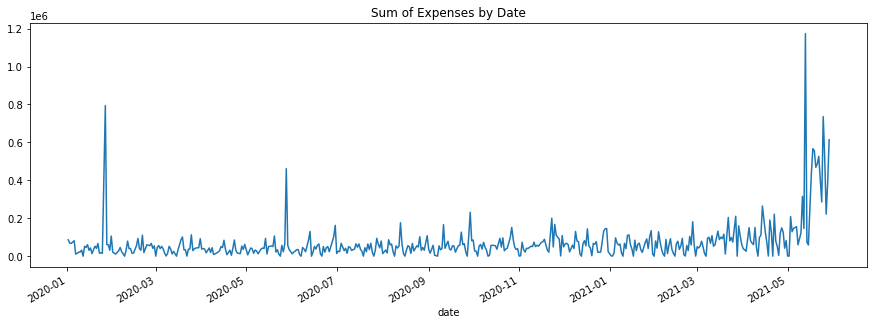

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Sum of Expenses by Date")
df_fleet.groupby(['date'])['total'].sum().plot(kind='line')
plt.show()


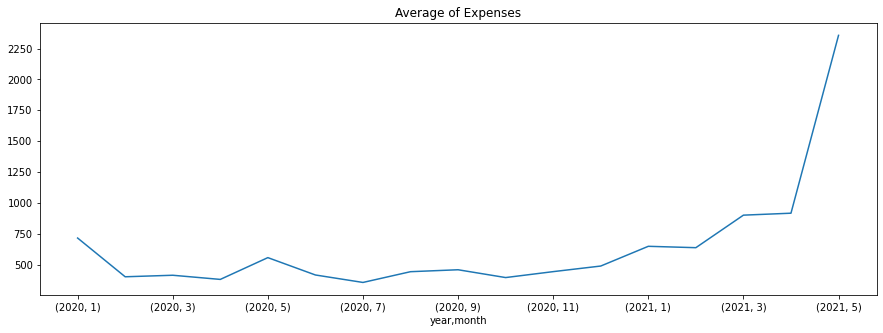

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Average of Expenses")
df_fleet.groupby(['year','month'])['total'].mean().plot(kind='line')
plt.show()

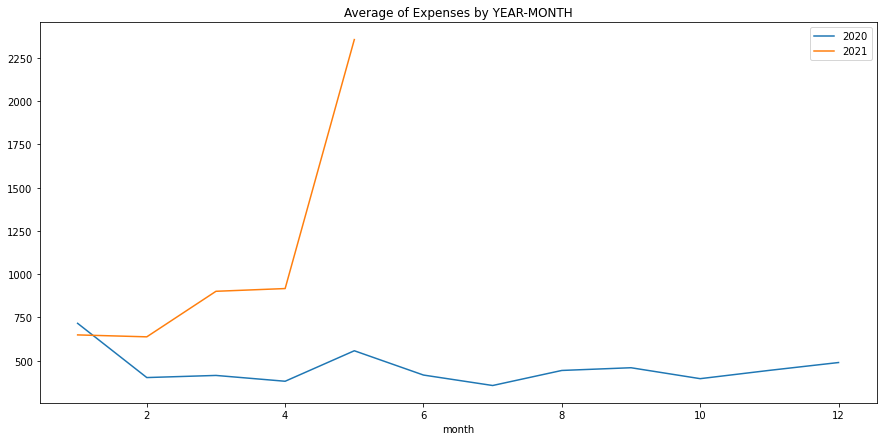

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

plt.title("Average of Expenses by YEAR-MONTH")
df_fleet[df_fleet['year']==2020].groupby(['month'])['total'].mean().plot(kind='line', legend=True, ax=ax)
df_fleet[df_fleet['year']==2021].groupby(['month'])['total'].mean().plot(kind='line', legend=True, ax=ax)
ax.legend(['2020', '2021'])
plt.show()

In [ ]:
df_fleet.head(1)

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner,year,month
0,UNIPETRO - AD,BJQ2825,MANUTENÇÃO DE MOTOR,2020-03-03,1822.0,S M DA SILVA ME,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,1.0,40.0,MB,LS 1935,TOCO,CAVALO,OPERACIONAL,1993.0,10000.0,ENTREGA ARLA,TUPA,TUPA,2020,3


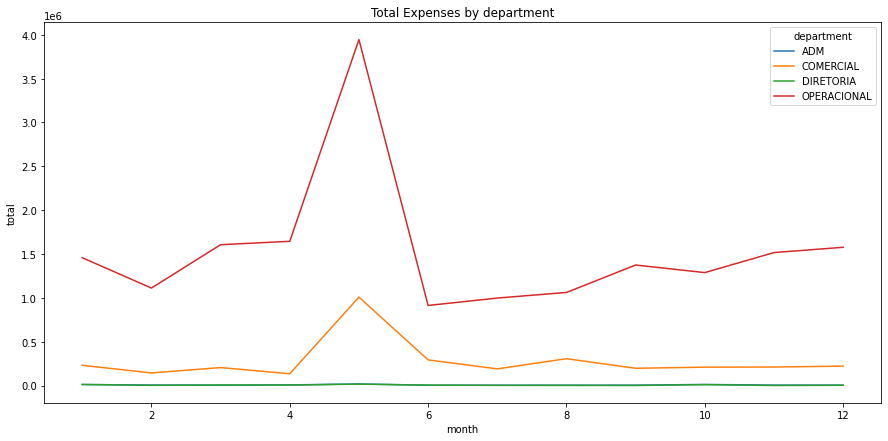

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Total Expenses by department")
total_dpto = df_fleet.groupby(['department','year', 'month'])['total'].sum().reset_index()#.plot(kind='line', legend=True, ax=ax)
total_dpto['date'] = df_fleet.apply(lambda x: pd.to_datetime(f"{int(x['year'])}-{int(x['month'])}-01"),axis=1)
total_dpto
sns.lineplot(x = 'month', y = 'total',data = total_dpto,hue='department',ci= None)
plt.show()

##Comparative analysis with pie chart
Division of services (lines) by department

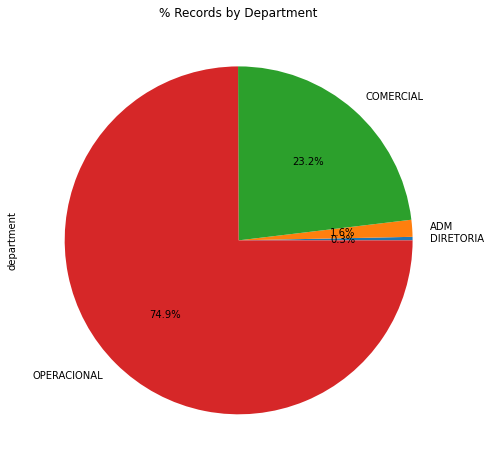

In [ ]:
fig = plt.figure(figsize=(10,8))

plt.title('% Records by Department')
(df_fleet.groupby('department')['department'].count().sort_values()).plot(kind='pie', autopct='%1.1f%%')
plt.show()

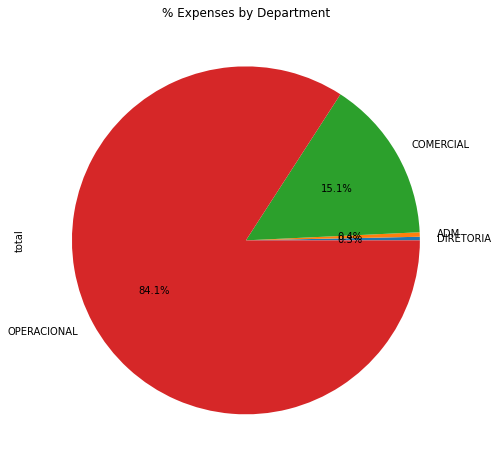

In [ ]:
fig = plt.figure(figsize=(10,8))

plt.title('% Expenses by Department')
(df_fleet.groupby('department')['total'].sum().sort_values()).plot(kind='pie', autopct='%1.1f%%')
plt.show()

ANALYSIS OF PROPORTIONS

More than 70% of the records are related to OPERATIONAL, and the volume of expenses corresponds to more than 80% of the total
COMMERCIAL is the second department with the most records in the database, both in number of records and in value spent

#Comparative analysis with bars

*  Frequency (absolute or relative) of services (lines) by the branch name
*  Frequency (absolute or relative) of services (lines) by the license
*   Frequency (absolute or relative) of services (lines) by area description
*   Frequency (absolute or relative) of services (lines) by supllier
*   Frequency (absolute or relative) of services (lines) by tax_description
*   Frequency (absolute or relative) of services (lines) by product
*   Frequency (absolute or relative) of services (lines) by brand name
*   Frequency (absolute or relative) of services (lines) by vehicle type
*   Frequency (absolute or relative) of services (lines) by model year
*   Frequency (absolute or relative) of services (lines) by the affiliate
*   Frequency (absolute or relative) of services (lines) by the owner
*   Frequency (absolute or relative) of services (lines) by the affiliate name
*   Frequency (absolute or relative) of services (lines) by the aplication
*   Frequency (absolute or relative) of services (lines) by the truck type
*   Frequency (absolute or relative) of services (lines) by the department




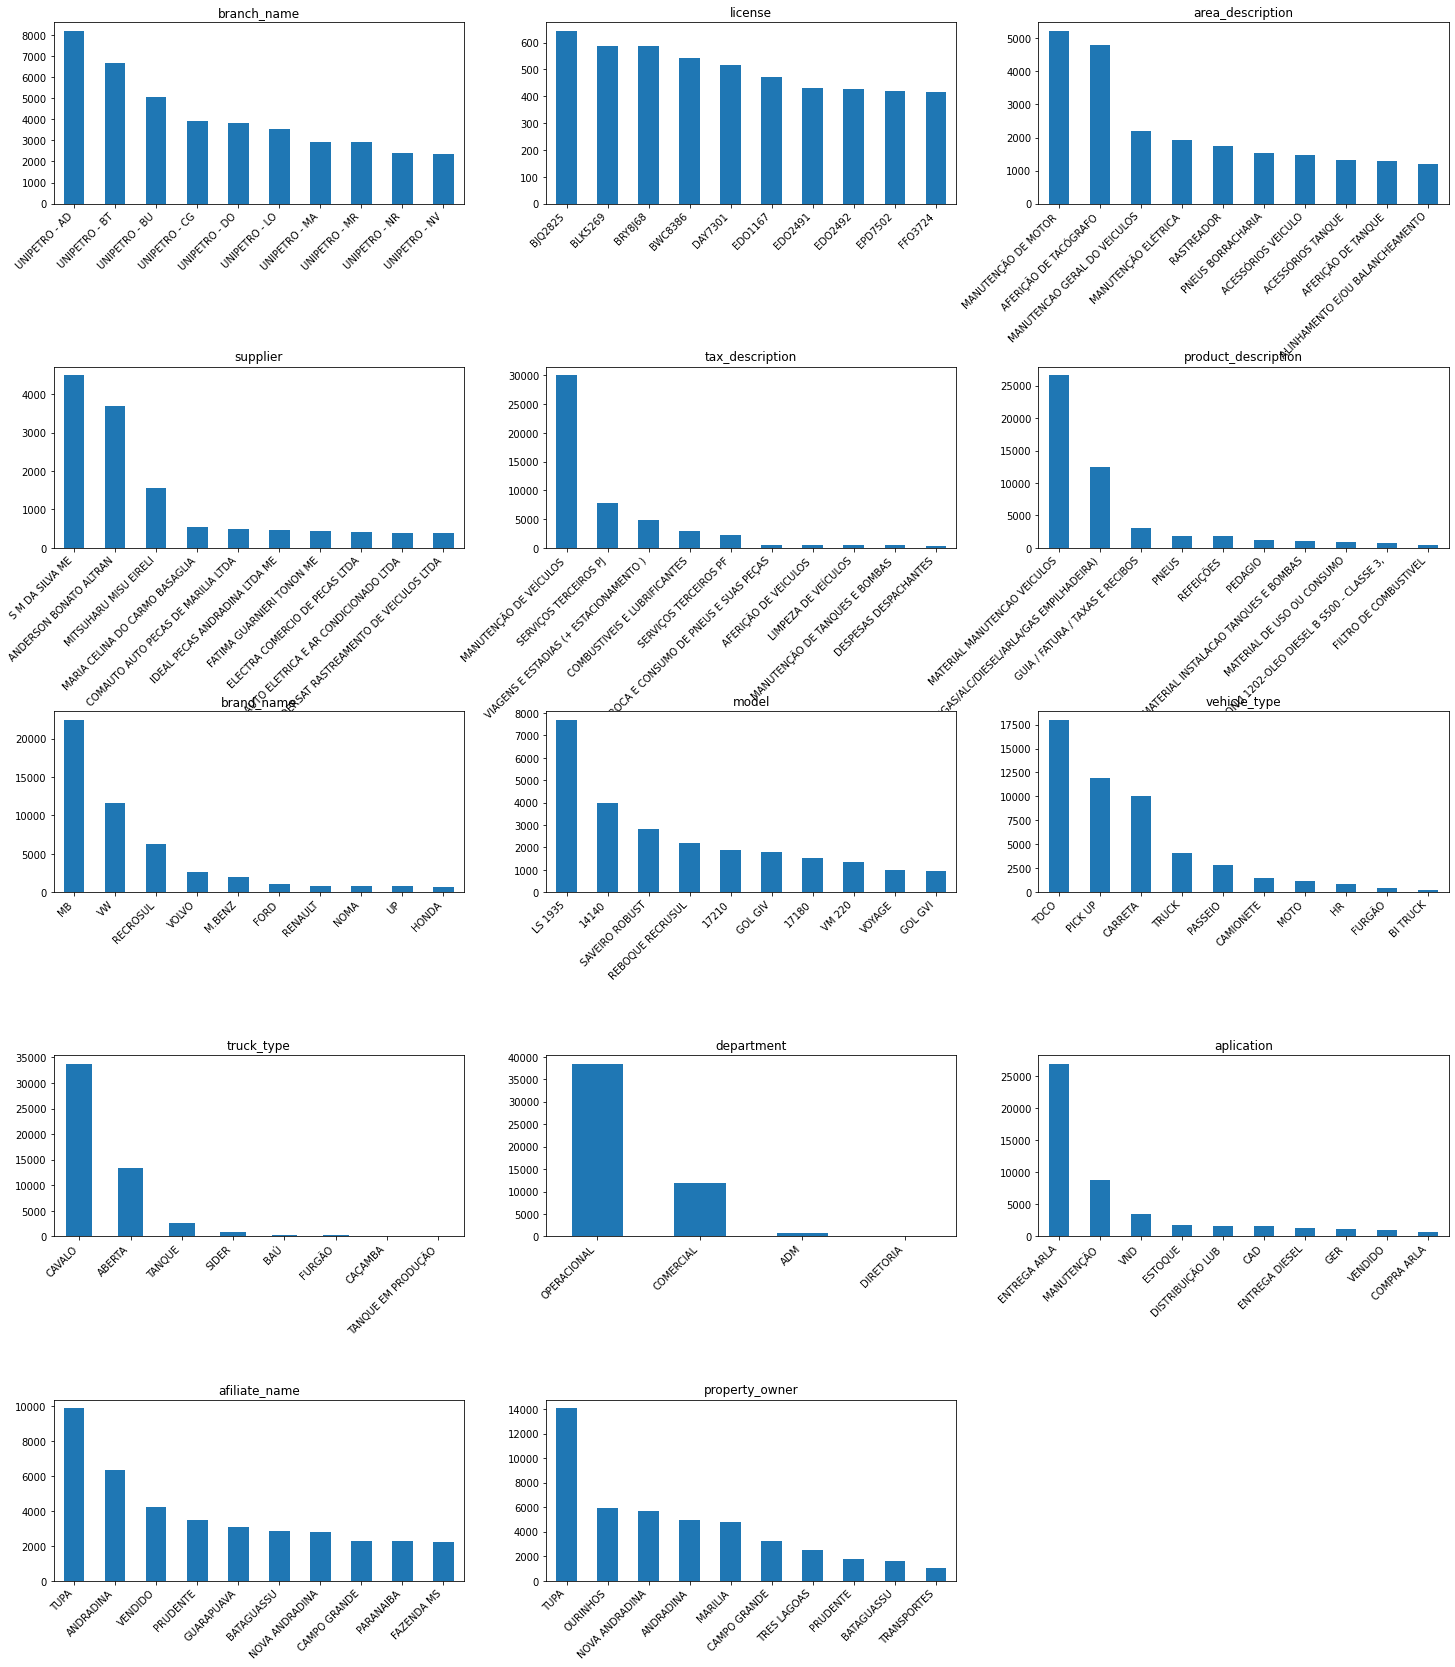

In [ ]:
fig = plt.figure(figsize=(25,35))
j=1
for col in textual_columns:
  #if(df_fleet[col].dtype == 'object') and col not in ['data']):
  ax = fig.add_subplot(6, 3, j)
  plt.subplots_adjust(hspace = .9)
  j += 1
  if (len(df_fleet[col].unique()) > 10):
    df_fleet[col].value_counts()[:10].plot(kind='bar', ax=ax,title=col).set_xticklabels(df_fleet[col].unique(), rotation=45, ha='right')
  else:
    df_fleet[col].value_counts().plot(kind='bar', ax=ax,title=col).set_xticklabels(df_fleet[col].unique(), rotation=45, ha='right')

#Comparative analysis with boxplot 

*   Cost variation by afiliate
*   Cost variation by license
*   Cost variation by supplier
*   Cost variation by tax_description 
*   Cost variation by product_description
*   Cost variation by brand name
*   Cost variation by vehicle_type
*   Cost variation by model_year
*   Cost variation by branch_name
*   Cost variation by ownership




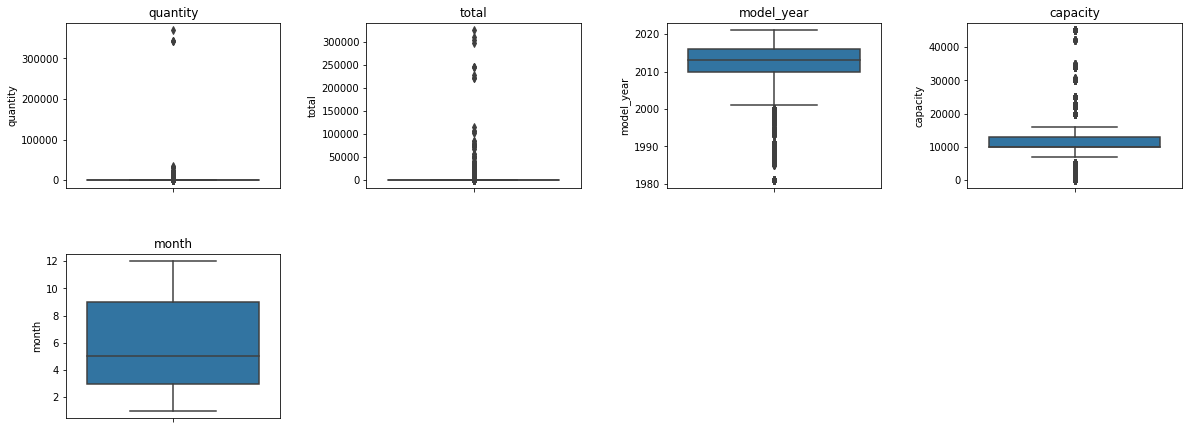

In [ ]:
#BOXPLOT TO VERIFY VARIATION AND OUTLIER OF NUMERICAL VARIABLES
i = 1
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for j,c in enumerate(df_fleet.columns):
    if df_fleet[c].dtypes != 'O' and c not in ['date','year','document','tax_code']:
        ax = fig.add_subplot(5, 4, i)
        sns.boxplot(y = c,data = df_fleet,ax = ax)
        plt.title(c)
        i +=  1

**BOXPLOT ANALYSIS**

It can be observed that there is an outlier that greatly distorts the behaviour of the data in the QUANTITY and TOTAL variables

in the capacity column there are few outliers.

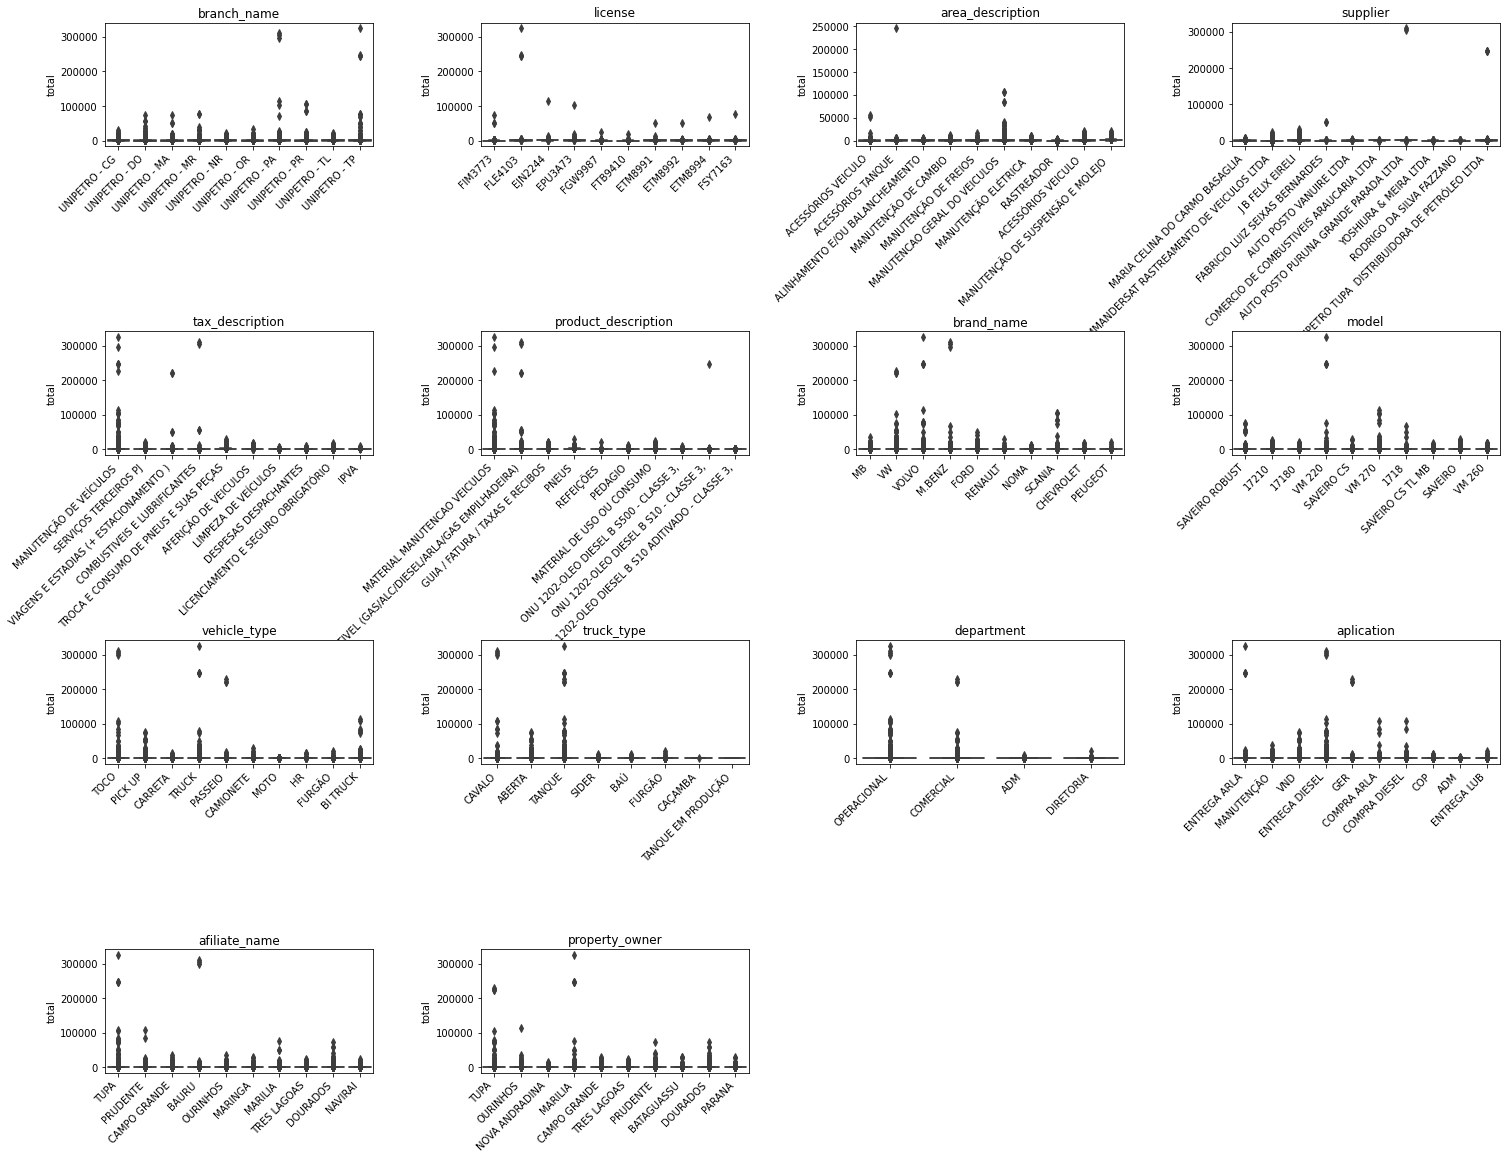

In [ ]:
#BOXPLOT OF CATEGORY VARIABLES BY TOTAL VARIABLE
#PURPOSE IS TO IDENTIFY THE BEHAVIOUR OF THE VARIABLES FOR THE (TOTAL) MAINTENANCE EXPENSES,
#IF THERE IS DISTINCTION OR PATTERN IN BEHAVIOUR.
i = 1
fig = plt.figure(figsize = (25,25))
fig.subplots_adjust(hspace=1.5, wspace=0.4)
for j,c in enumerate(df_fleet.columns): #['VL_FLX_VNCT','VL_VNCT','VL_FATM','IN_TRNS_TITD']):
  if df_fleet[c].dtypes == 'O' and c not in ['date']:
        ax = fig.add_subplot(5, 4, i)
        qtd = df_fleet[c].value_counts()[:10]
        sns.boxplot(y ='total',x= c,data = df_fleet.loc[df_fleet[c].isin(qtd.index),:],ax = ax)#.set_xticklabels(df_fleet[col].unique(), rotation=45, ha='right')
        plt.xticks(rotation=45,ha='right')
        plt.xlabel('')
        plt.title(c) 
        i +=  1



**BOXPLOT ANALYSIS**


*   It can be seen that the recognized views are unreadable for some reasons:
    - 'TOTAL' column are aproximated to 0
    - There are some outliers that is imparing the view
*   With the data in this situation, it is only possible to analyze the most striking outliers, such as:
    - Branch in unipetro-TP there is a very different amount in relation to the others
    - FLE4103 board there is a very outlier
    - VW and VOLVO brands have higher expenses compared to other brands

**We can apply data normalization with LOG to improve visualizations and adjust some outlier values**



In [ ]:
#Appling LOG in some columns
df_fleet['total_log'] = df_fleet.total.apply(lambda x: 0 if np.isinf(np.log(x)) else np.log(x) ) 
df_fleet['quantity_log'] = df_fleet.quantity.apply(lambda x: 0 if np.isinf(np.log(x)) else  np.log(x)) 
df_fleet['capacity_log'] = df_fleet.capacity.apply(lambda x: 0 if np.isinf(np.log(x)) else np.log(x) )

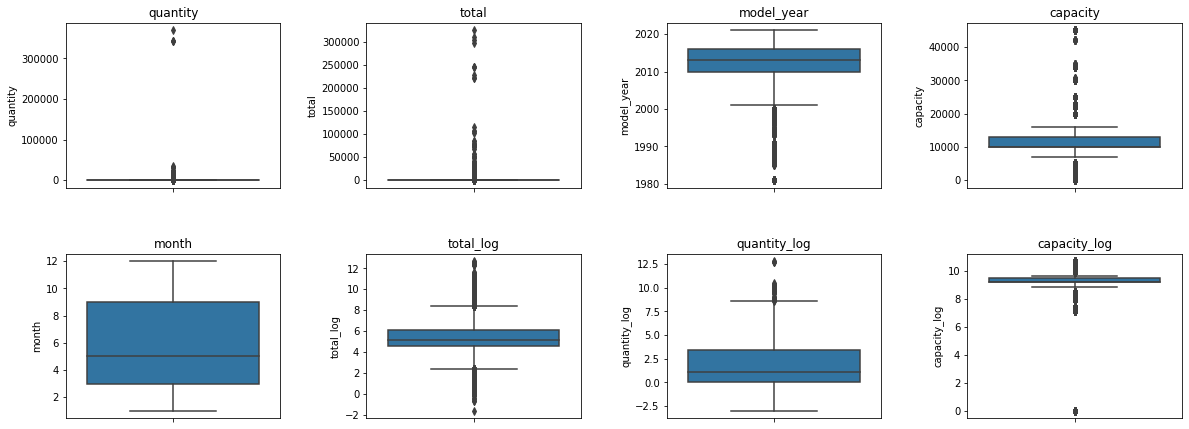

In [ ]:
##BOXPLOT TO VERIFY VARIATION AND OUTLIER OF NUMERICAL VARIABLES
i = 1
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for j,c in enumerate(df_fleet.columns):
    if df_fleet[c].dtypes != 'O' and c not in ['date','year','document','tax_code']:
        ax = fig.add_subplot(5, 4, i)
        sns.boxplot(y = c,data = df_fleet,ax = ax)
        plt.title(c)
        i +=  1

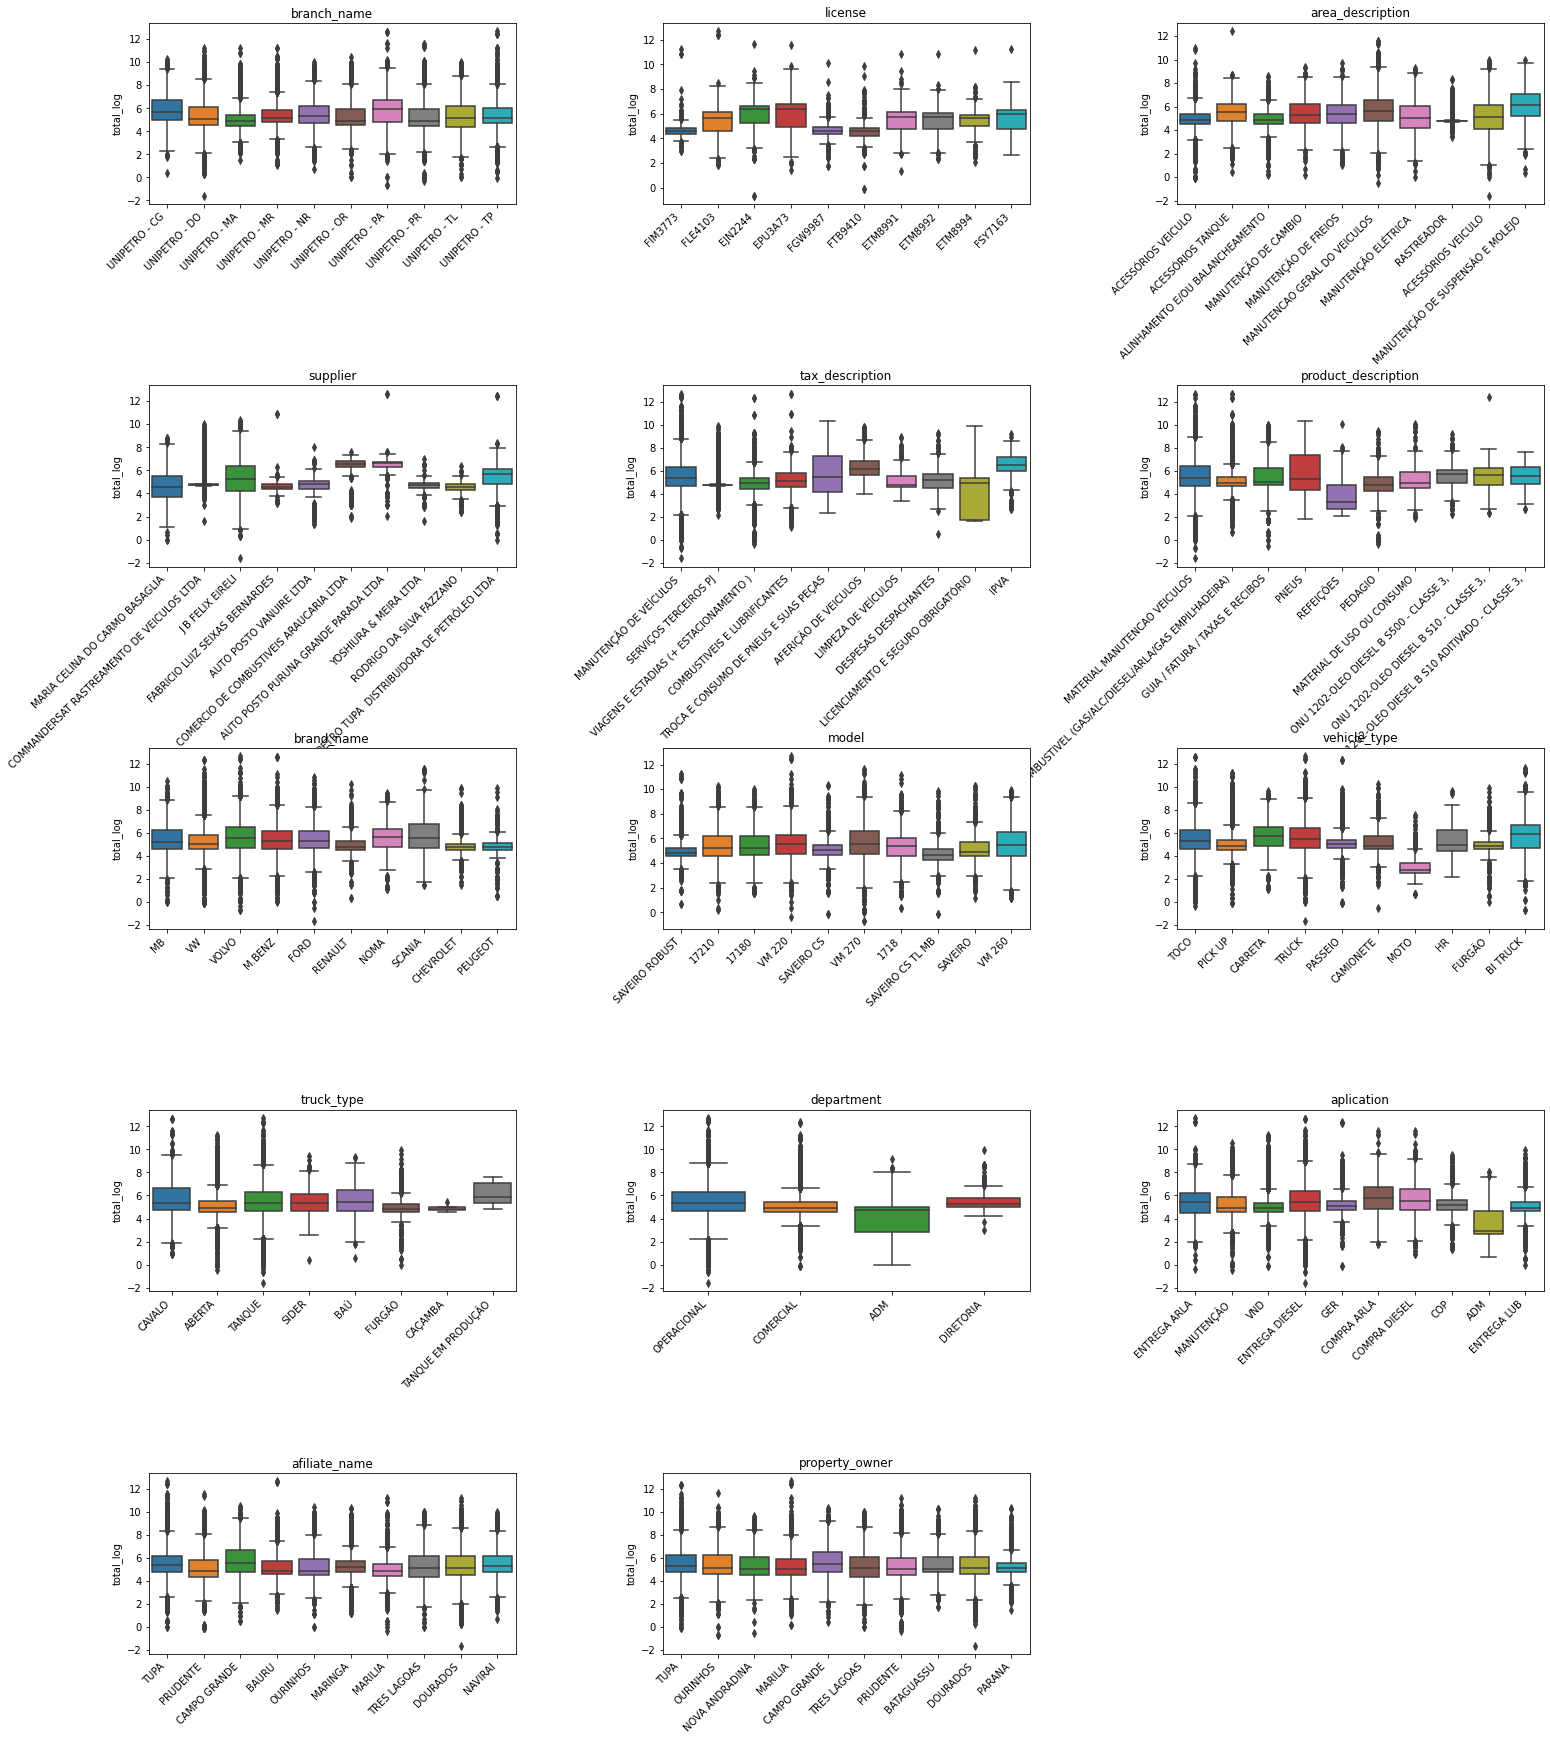

In [ ]:

i = 1
fig = plt.figure(figsize = (25,30))
fig.subplots_adjust(hspace=1.0, wspace=0.4)
for j,c in enumerate(df_fleet.columns):
  if df_fleet[c].dtypes == 'O' and c not in ['date']:
        ax = fig.add_subplot(5, 3, i)
        qtd = df_fleet[c].value_counts()[:10]
        sns.boxplot(y ='total_log',x= c,data = df_fleet.loc[df_fleet[c].isin(qtd.index),:],ax = ax)#.set_xticklabels(df_fleet[col].unique(), rotation=45, ha='right')
        plt.xticks(rotation=45,ha='right')
        plt.xlabel('')
        plt.title(c)
        i +=  1
plt.show()

#Distribution analysis with histogram


*   Model_year distribution
*   Quantity distribution
*   Total distribution






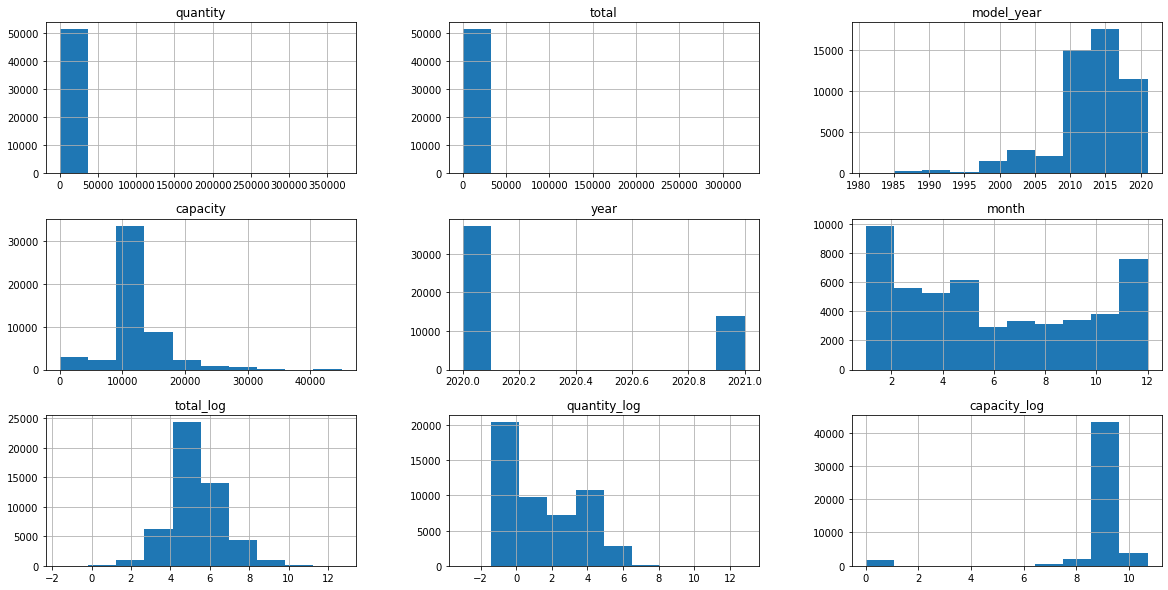

In [ ]:
df_fleet.drop(columns=['document','tax_code']).hist(figsize=(20,10))
plt.show()

**ANÁLISE DOS HISTOGRAMAS**


*   outlier in quantity, total, capacity
*   higher frequency of records between the month 1 and 2, 11 and 12
*   vehicles between 2010 and 2020 are the majority






(29231, 26)


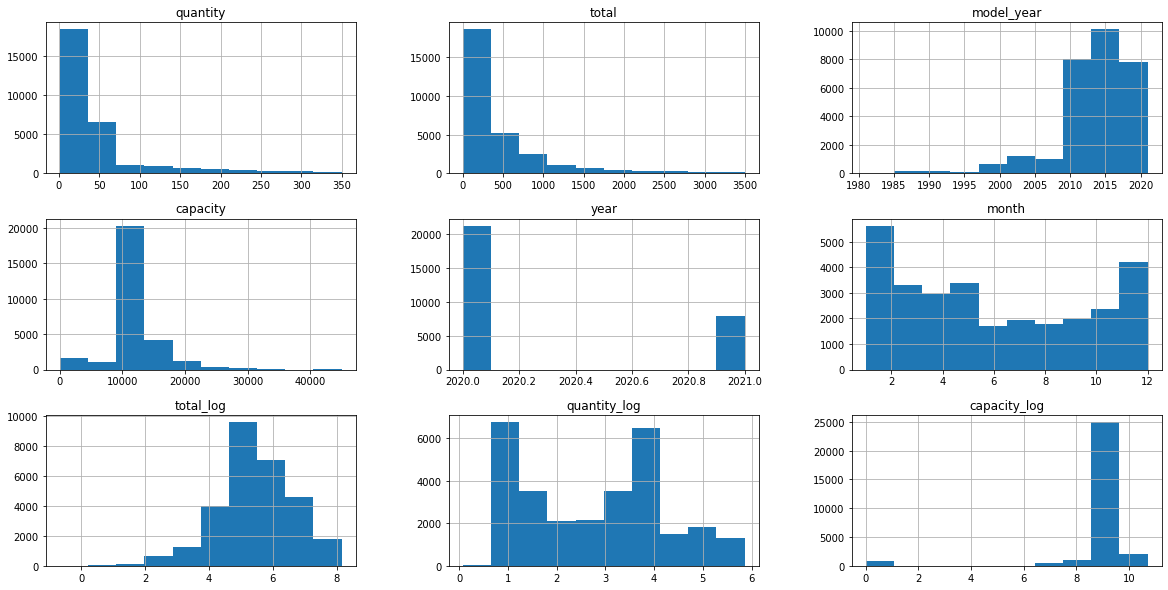

In [ ]:
## DROPPING THE OUTLIER
df_fleet_clean = df_fleet.query("quantity < 350 and quantity > 1 and total < 3500 and total > 0")
print(df_fleet_clean.shape)

## CHECKING THE DISTRIBUTION OF VARIABLES
df_fleet_clean.drop(columns=['document','tax_code']).hist(figsize=(20,10))
plt.show()

##**PAIR PLOT**

Correcting the outliers based on previus analysis 

In [ ]:
## function to indentify the outliers based in the lower and upper limits  

def get_limits_quantile(data):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    
    sup = q3 + 1.5 * (q3-q1)
    inf = q1 - 1.5 * (q3-q1)
    
    return inf, sup
print('OK')

OK


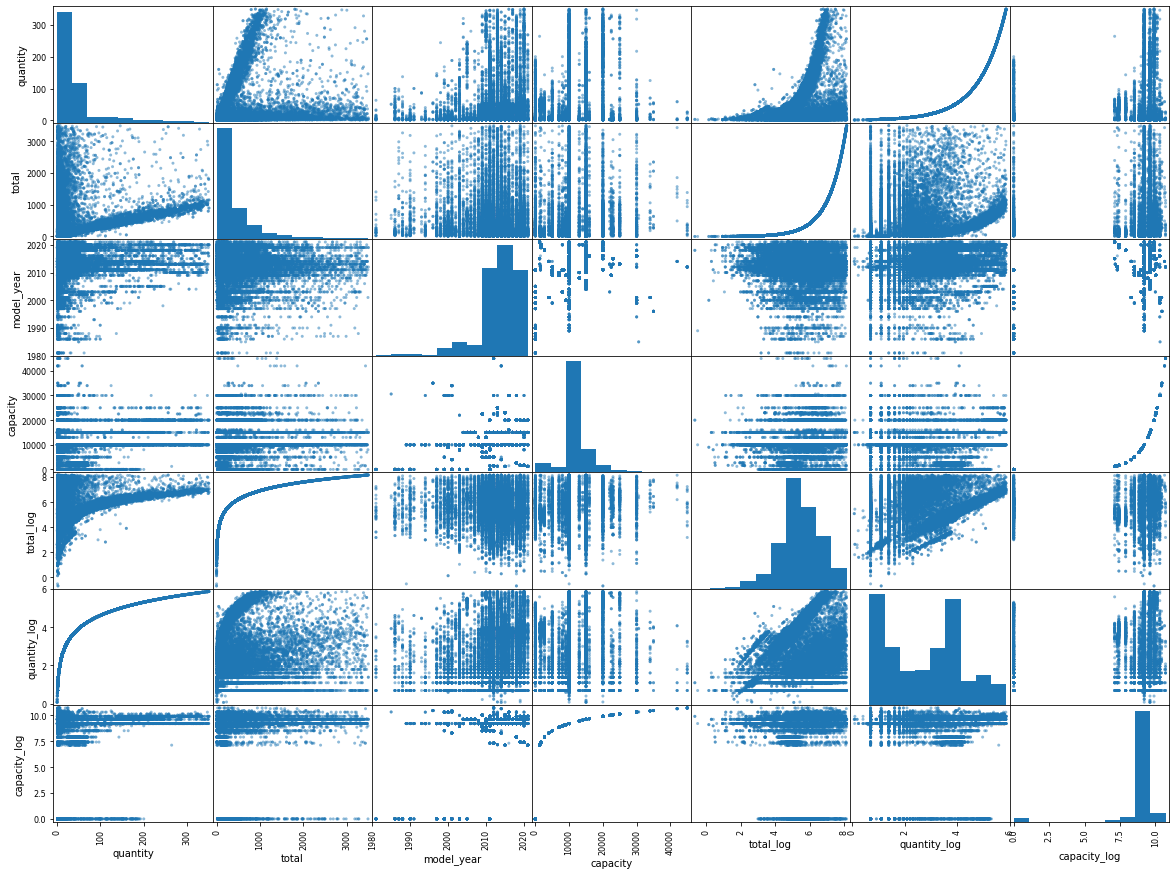

In [ ]:
#sns.pairplot(df_fleet[numerical_columns] )
pd.plotting.scatter_matrix(df_fleet_clean.drop(columns=['document','tax_code','month','year']), figsize=(20,15))
plt.show()

#Heatmap correlation analysis


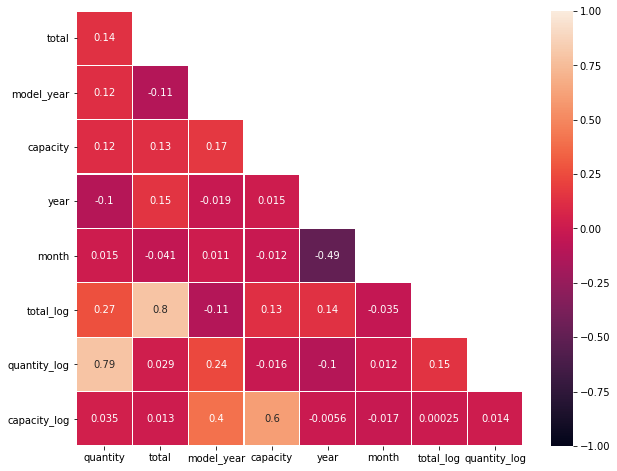

In [ ]:
plt.figure(figsize=(10,8))
cor_pearson = df_fleet_clean.drop(columns=['document','tax_code']).corr()
mask = np.triu(np.ones_like(cor_pearson, dtype=np.bool))
mask = mask[1:, :-1]
corr = cor_pearson.iloc[1:,:-1].copy()

sns.heatmap(corr,annot=True, linewidths=.3,vmin=-1, vmax=1, mask=mask)

**PEARSON CORRELATION ANALYSIS**


*   The Y(total) variable has quantity and capacity correlation
*   The Y(total_log) LOG variable has quantity, capacity and capacity_log correlaton
*   Indicative that we can develop linear regression models with normal and normalized variables with LOG






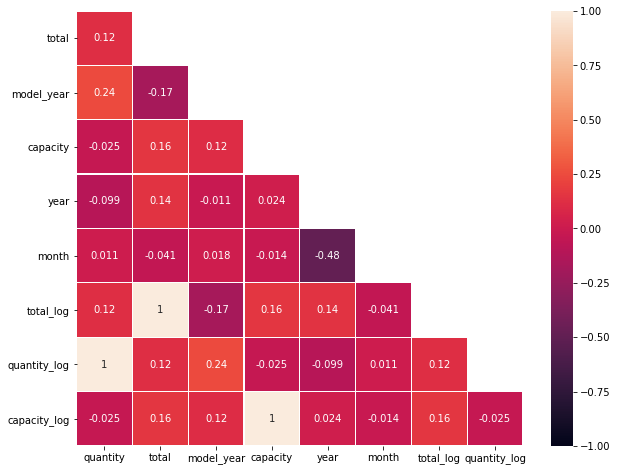

In [ ]:
# CORRELAÇÃO DE SPEARMAN
plt.figure(figsize=(10,8))
cor_sperman = df_fleet_clean.drop(columns=['document','tax_code']).corr('spearman')
mask = np.triu(np.ones_like(cor_sperman, dtype=np.bool))
mask = mask[1:, :-1]
corr = cor_sperman.iloc[1:,:-1].copy()

sns.heatmap(corr,annot=True, linewidths=.3,vmin=-1, vmax=1, mask=mask)


**ANALYSIS OF SPEARMAN CORRELATIONS**
There was no significant change in any correlation of total and total_log

In [ ]:
df_fleet_clean.to_csv('df_fleet_final.csv',index = False)

In [ ]:
df_fleet.shape, df_fleet_clean.shape

((51254, 26), (29231, 26))

#**CLUSTERS**

In [ ]:
!pip install yellowbrick=='1.2.1'

     |████████████████████████████████| 269 kB 12.6 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
import pandas as pd
import numpy as np

from yellowbrick.cluster import KElbowVisualizer ## ELBOW Method
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## defining color palette for graphs
sns.set_palette('tab10')

##Data collection and preparation for cluster


In [ ]:
## COLLECTING DATA
df = pd.read_csv("df_fleet_final.csv")
#df_clean = df.drop(['document', 'tax_code', 'total_log', 'quantity_log', 'capacity_log', 'area_descption', 'date','license'])
## SELECT THE IMPORTANT COLUMNS FOR CLUSTER MODEL

df_clean = df[['branch_name', 'tax_description', 'quantity', 'total',
       'brand_name', 'vehicle_type', 'truck_type', 'department',
       'model_year', 'capacity', 'aplication', 'afiliate_name', 'month']]

In [ ]:
df_clean.shape

(29231, 13)

In [ ]:
df_clean.head(1)

,branch_name,tax_description,quantity,total,brand_name,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,month
0,UNIPETRO - AD,MANUTENÇÃO DE VEÍCULOS,2.0,320.4,VW,TOCO,ABERTA,OPERACIONAL,1990.0,0.0,MANUTENÇÃO,ANDRADINA,7


In [ ]:
df_clean.aplication.unique()

array(['MANUTENÇÃO', 'VND', 'CAD', 'ENTREGA DIESEL', 'GER', 'VENDIDO',
       'COMPRA DIESEL', 'CAR', 'COP', 'FAZENDA', 'ADM', 'ENTREGA LUB',
       'COMPRA ARLA', 'ENTREGA ARLA', 'SAEC', 'ASD', 'GRE MS',
       'DISTRIBUIÇÃO LUB', 'ESTOQUE', 'DIRETORIA', 'GRE PR',
       'AINDA NAO FATURADO', 'COR', 'DEVOLVIDO', 'EMPRESTADO MONTANHA',
       'AVGAS', 'GRE LUB', 'MANOEL GASPAR', 'LUIZ HENRIQUE',
       'PARADO / VENDA', 'GRE'], dtype=object)

##**Convert categorical variables (columns) to one-hot-encoding (get_dummies)**



*   Algorithm works only with numeric variables, so it will be necessary to convert text variables to numeric variables
*   The strategy adopted will be the application of one-hot-encoding, transforming the variables into columns and indicating with 1 (when there is the respective value) and 0 (when there is no value)



In [ ]:
one = OneHotEncoder()
data_cluster = pd.DataFrame(one.fit_transform(df_clean[['branch_name', 'tax_description', 
                                                         'brand_name', 'vehicle_type', 'truck_type', 'department',
                                                         'aplication', 'afiliate_name']]).toarray(),
                             columns=one.get_feature_names())
data_cluster = pd.concat([df_clean[['quantity', 'total','model_year', 'capacity', 'month']],data_cluster],axis=1)

data_cluster.shape

(29231, 161)

In [ ]:
data_cluster.head(3)

,quantity,total,model_year,capacity,month,x0_UNIPETRO - AD,x0_UNIPETRO - BT,x0_UNIPETRO - BU,x0_UNIPETRO - CG,x0_UNIPETRO - DO,x0_UNIPETRO - LO,x0_UNIPETRO - MA,x0_UNIPETRO - MR,x0_UNIPETRO - NR,x0_UNIPETRO - NV,x0_UNIPETRO - OR,x0_UNIPETRO - PA,x0_UNIPETRO - PB,x0_UNIPETRO - PR,x0_UNIPETRO - TL,x0_UNIPETRO - TP,x1_AFERIÇÃO DE VEICULOS,x1_ALUGUEIS,x1_COMBUSTIVEIS E LUBRIFICANTES,x1_COMBUSTIVEIS E LUBRIFICANTES TOTAL,x1_COMPRAS DE BENS-MAQS. FERRAM. EQUIP.,x1_COMPRAS DE DIESEL,x1_CONTRIBUICAO CONFEDERATIVA,"x1_DEMAIS IMPOSTOS,TAXAS / CONTRIBUIÇÕES",x1_DESPESAS DESPACHANTES,x1_FERRAMENTAS,x1_IMPOSTOS-C.S.L.L.,x1_IPVA,"x1_LANCHES, REFEIÇÕES E CONFRATERNIZAÇÂO",x1_LICENCIAMENTO E SEGURO OBRIGATÓRIO,x1_LIMPEZA DE VEÍCULOS,"x1_MANUTENCAO DE MÓVEIS, MÁQUINAS E UTENSIL",x1_MANUTENÇÃO DE TANQUES E BOMBAS,x1_MANUTENÇÃO DE VEÍCULOS,x1_MANUTENÇÃO DE VEÍCULOS TOTAL,...,x6_FAZENDA,x6_GER,x6_GRE,x6_GRE LUB,x6_GRE MS,x6_GRE PR,x6_LUIZ HENRIQUE,x6_MANOEL GASPAR,x6_MANUTENÇÃO,x6_PARADO / VENDA,x6_SAEC,x6_VENDIDO,x6_VND,x7_ANDRADINA,x7_ARAUCÁRIA,x7_BATAGUASSU,x7_BAURU,x7_CAMPO GRANDE,x7_CASCAVEL,x7_DEVOLVIDO,x7_DEVOLVIOD,x7_DOURADOS,x7_FAZENDA MS,x7_GUARAPUAVA,x7_LONDRINA,x7_MARILIA,x7_MARINGA,x7_NAVIRAI,x7_NOVA ANDRADINA,x7_OURINHOS,x7_PARADO/TUPA,x7_PARANAIBA,x7_PARANAÍBA,x7_PAULINIA,x7_PRUDENTE,x7_SUMARÉ,x7_TRANSPORTADORA,x7_TRES LAGOAS,x7_TUPA,x7_VENDIDO
0,2.000,320.40,1990.0,0.0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33.000,133.51,1990.0,0.0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94.415,286.36,2020.0,10000.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Data Normatization**

*   Normalizing the data to be on the same scale, this helps the algorithm identify similar data to assemble the clusters.




In [ ]:
data_cluster_nor = MinMaxScaler().fit_transform(data_cluster)
data_cluster_nor

array([[0.00265374, 0.09152659, 0.225     , ..., 0.        , 0.        ,
        0.        ],
       [0.0915898 , 0.03805382, 0.225     , ..., 0.        , 0.        ,
        0.        ],
       [0.26778363, 0.0817871 , 0.975     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06576966, 0.0281913 , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.995295  , 0.40497275, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.02560498, 0.0498362 , 0.8       , ..., 0.        , 1.        ,
        0.        ]])

##**CLUSTER KMEANS**
###Better cluster number indentify



*   This analysis helps to identify the best cluster number for the kmeans algorithm
*   The yellowbricks package already has functions that perform this analysis
*   The method used will be **ELBOW**






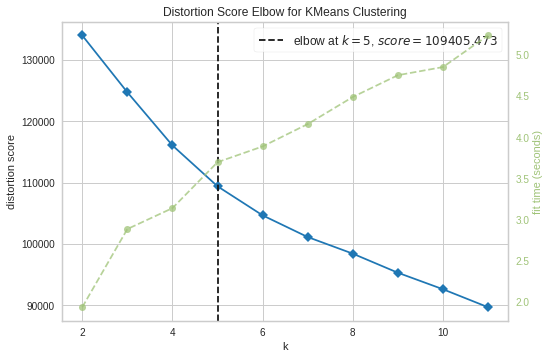

In [ ]:
elbow = KElbowVisualizer(KMeans(random_state=42), k=(2,12))## EXECUTING AND VIZUALIZING THE ELBOW RESULT
elbow.fit(data_cluster_nor) 
elbow.show()

In [ ]:
## BASED ON THE PREVIOUS RESULT, TRAIN THE FINAL CLUSTER ALGORITHM USING KMEANS
## KMEANS WITH 5 CLUSTER
kmeans = KMeans(n_clusters= 5,  random_state = 42)

## TRAINING AND DEFINITION OF CLUSTERS WITH KMEANS
clusters_m = kmeans.fit_predict(data_cluster_nor)

CLUSTERS RECORDS: 
 0    8442
2    7080
1    6160
3    4419
4    3130
Name: cluster, dtype: int64


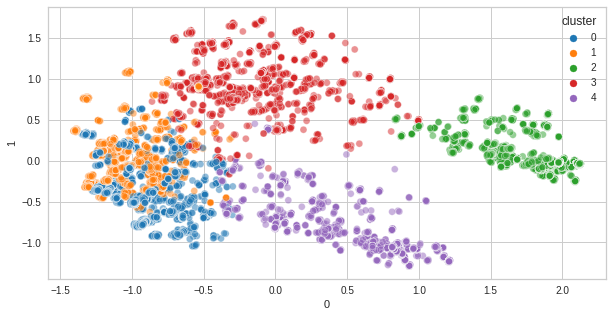

In [ ]:
## PCA METHOD USED TO DECREASE DATABASE DIMENSIONS TO 2 DIMENSION
#THIS METHOD IS USED ONLY TO VIEW PREVIOUSLY TRAINED CLUSTERS
pca = PCA(n_components=2)
df_pca = pca.fit_transform(data_cluster_nor)
df_pca = pd.DataFrame(df_pca)
df_pca['cluster'] = clusters_m
print("CLUSTERS RECORDS: \n", df_pca['cluster'].value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=df_pca['cluster'],palette='tab10', alpha=.5)

**PCA CLUSTER ANALYSIS**
 - It can be seen that the clusters were well divided
 - Clusters 0, 3 and 4 called quite separate, mean that the data is very similar for each cluster
 - Clusters 1 and 2 have already been mixed, indicating that the algorithm was not able to separate these two clusters as well
 - Overall the algorithm obtained a good result.

##CLUSTER ANALYSIS
 - A descriptive analysis will be applied in the cluster to identify any profile, pattern and the like

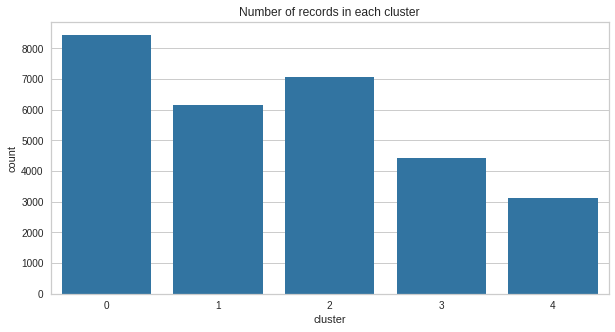

In [ ]:
df['cluster'] = clusters_m

plt.figure(figsize=(10,5))
sns.countplot(x = 'cluster', data = df ,color=sns.color_palette('tab10')[0])
plt.title("Number of records in each cluster")
plt.show()


 **Clusters Records **
  - Cluster 3 has the lowest records
  - Cluster 1 has more records numbers
  - Cluster are well distributed

In [ ]:
df.head()

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner,year,month,total_log,quantity_log,capacity_log,cluster
0,UNIPETRO - AD,BLK5269,MANUTENCAO GERAL DO VEICULOS,2020-07-21,2816.0,MARIA CELINA DO CARMO BASAGLIA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,2.000,320.40,VW,14140,TOCO,ABERTA,OPERACIONAL,1990.0,0.0,MANUTENÇÃO,ANDRADINA,OURINHOS,2020,7,5.769570,0.693147,0.00000,3
1,UNIPETRO - AD,BLK5269,MANUTENÇÃO DE MOTOR,2020-07-02,2528.0,MARIA CELINA DO CARMO BASAGLIA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,33.000,133.51,VW,14140,TOCO,ABERTA,OPERACIONAL,1990.0,0.0,MANUTENÇÃO,ANDRADINA,OURINHOS,2020,7,4.894176,3.496508,0.00000,3
2,UNIPETRO - AD,BRY8J68,RASTREADOR,2020-02-27,22020.0,CARTAO VISA - DOUGLAS HENRIQUE BEZERRA,17405.0,VIAGENS E ESTADIAS (+ ESTACIONAMENTO ),COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHADE...,94.415,286.36,VW,SAVEIRO ROBUST,PICK UP,ABERTA,COMERCIAL,2020.0,10000.0,VND,ANDRADINA,TUPA,2020,2,5.657250,4.547700,9.21034,2
3,UNIPETRO - AD,BRY8J68,RASTREADOR,2020-02-28,32020.0,DOUGLAS HENRIQUE BEZERRA-AD,17405.0,VIAGENS E ESTADIAS (+ ESTACIONAMENTO ),COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHADE...,25.009,70.00,VW,SAVEIRO ROBUST,PICK UP,ABERTA,COMERCIAL,2020.0,10000.0,VND,ANDRADINA,TUPA,2020,2,4.248495,3.219236,9.21034,2
4,UNIPETRO - AD,BRY8J68,RASTREADOR,2020-02-29,32020.0,DOUGLAS HENRIQUE BEZERRA-AD,17405.0,VIAGENS E ESTADIAS (+ ESTACIONAMENTO ),COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHADE...,47.190,150.96,VW,SAVEIRO ROBUST,PICK UP,ABERTA,COMERCIAL,2020.0,10000.0,VND,ANDRADINA,TUPA,2020,2,5.017015,3.854182,9.21034,2


In [ ]:
df.rename(columns={'quantidade':'quantity', 'ano_modelo':'model_year','capacidade':'capacity'},inplace=True)

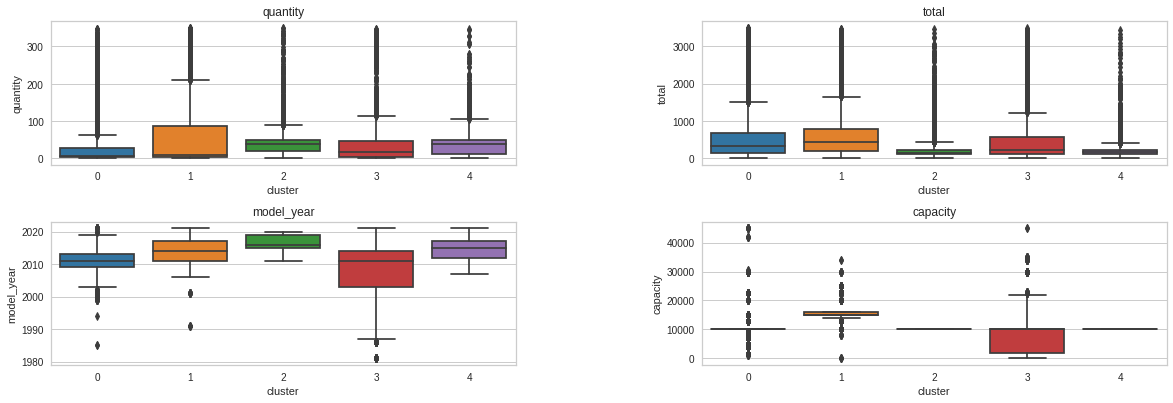

In [ ]:
i = 1
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for c in ['quantity','total','model_year','capacity']: # df.columns:
      ax = fig.add_subplot(3, 2, i)
      sns.boxplot(y = c,data = df,x='cluster',ax = ax,showfliers = True)#,palette=paleta)
      plt.title(c)
      i +=  1

**BOXPLOT ANALYSIS**

It can be seen in QUANTITY that the clusters have a slight difference in the mediated (center lines of the box) between them

Cluster 0, 4 and 3 with a similar behavior for QUANTITY.

As for TOTAL, clusters 0, 1 and 2 have a very similar behavior

It is possible to observe that vehicles with capacity value cluster 0 and 2 have some similarity. 

For model year has more variaty of records with the median allways above 2010. 

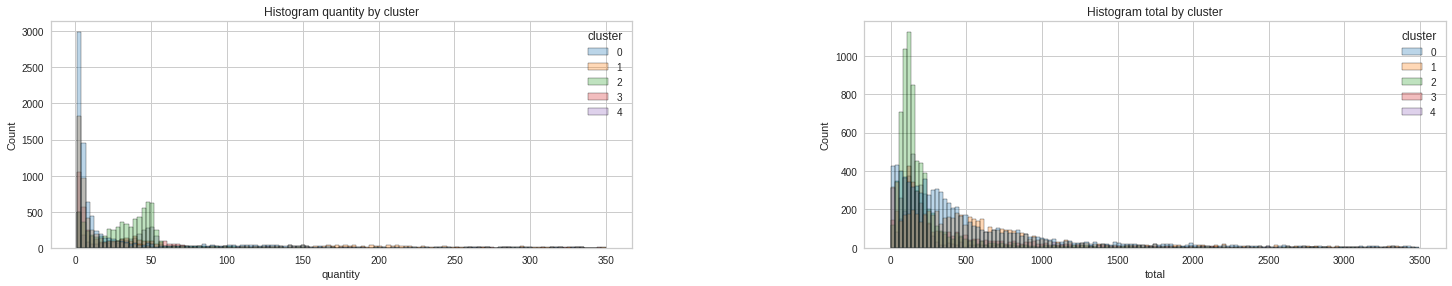

In [ ]:
fig = plt.figure(figsize = (25,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i=1
for c in ['quantity','total']: # df.columns:
  ax = fig.add_subplot(2, 2, i)
  sns.histplot(data = df,x=c,hue='cluster', alpha=.3, palette='tab10',ax=ax)
  plt.title(f"Histogram {c} by cluster")
  i +=  1
plt.show()

In [ ]:
df.head(1)

,branch_name,license,area_description,date,document,supplier,tax_code,tax_description,product_description,quantity,total,brand_name,model,vehicle_type,truck_type,department,model_year,capacity,aplication,afiliate_name,property_owner,year,month,total_log,quantity_log,capacity_log,cluster
0,UNIPETRO - AD,BLK5269,MANUTENCAO GERAL DO VEICULOS,2020-07-21,2816.0,MARIA CELINA DO CARMO BASAGLIA,15508.0,MANUTENÇÃO DE VEÍCULOS,MATERIAL MANUTENCAO VEICULOS,2.0,320.4,VW,14140,TOCO,ABERTA,OPERACIONAL,1990.0,0.0,MANUTENÇÃO,ANDRADINA,OURINHOS,2020,7,5.76957,0.693147,0.0,3


In [ ]:
df.rename(columns={'documento':'document','placa':'license','data':'date','ano_modelo':'model_year','centro_custo_codigo':'tax_code','ano':'year','quantidade_log':'quantity_log','capacidade_log':'capacity_log'},inplace=True)

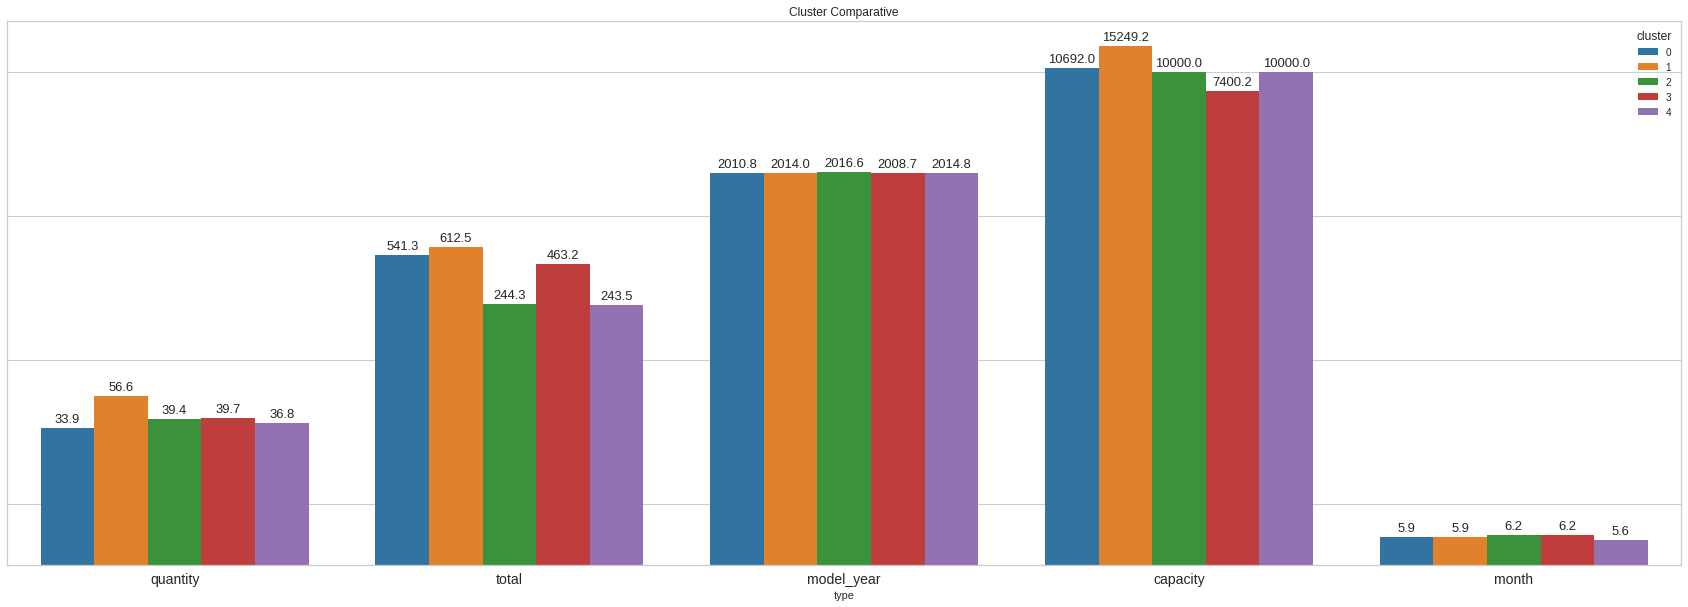

,cluster,branch_name,area_description,supplier,product_description,brand_name,model,vehicle_type,truck_type,department,aplication,afiliate_name,property_owner
0,0,"[UNIPETRO - DO, UNIPETRO - TP, UNIPETRO - TL]","[MANUTENCAO GERAL DO VEICULOS , ACESSÓRIOS VEI...",[UNIPETRO TUPA DISTRIBUIDORA DE PETRÓLEO LTDA...,"[MATERIAL MANUTENCAO VEICULOS, ONU 1202-OLEO D...","[VW, M.BENZ, FORD]","[1718, VM 270, 17180]","[TOCO, TRUCK, CARRETA]","[TANQUE, CAVALO, TANQUE EM PRODUÇÃO]",[OPERACIONAL],"[ENTREGA DIESEL, ENTREGA ARLA, COMPRA DIESEL]","[TUPA, DOURADOS, TRES LAGOAS]","[TUPA, DOURADOS, TRES LAGOAS]"
2,1,"[UNIPETRO - TP, UNIPETRO - PA, UNIPETRO - OR]","[MANUTENCAO GERAL DO VEICULOS , ACESSÓRIOS TAN...",[UNIPETRO TUPA DISTRIBUIDORA DE PETRÓLEO LTDA...,"[MATERIAL MANUTENCAO VEICULOS, COMBUSTIVEL (GA...","[VOLVO, M.BENZ, VW]","[VM 270, VM 220, VM 260]","[TRUCK, BI TRUCK, TOCO]","[TANQUE, CAVALO]",[OPERACIONAL],"[ENTREGA DIESEL, ENTREGA ARLA, COMPRA ARLA]","[TUPA, OURINHOS, PRUDENTE]","[TUPA, OURINHOS, MARILIA]"
1,2,"[UNIPETRO - PR, UNIPETRO - MA, UNIPETRO - MR]","[ACESSÓRIOS VEICULO, ALINHAMENTO E/OU BALANCHE...","[FABRICIO LUIZ SEIXAS BERNARDES, RODRIGO DA SI...",[COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHAD...,"[VW, CHEVROLET, RENAULT]","[SAVEIRO ROBUST, SAVEIRO, SAVEIRO CS]",[PICK UP],[ABERTA],"[COMERCIAL, OPERACIONAL, ADM]","[VND, COP, SAEC]","[PRUDENTE, BAURU, MARINGA]","[MARILIA, PRUDENTE, TUPA]"
3,3,"[UNIPETRO - TP, UNIPETRO - PR, UNIPETRO - OR]","[ACESSÓRIOS VEICULO, MANUTENCAO GERAL DO VEICU...",[UNIPETRO TUPA DISTRIBUIDORA DE PETRÓLEO LTDA...,"[MATERIAL MANUTENCAO VEICULOS, COMBUSTIVEL (GA...","[VW, M.BENZ, PEUGEOT]","[BOXER BUSINES L3, 420, 24250]","[TRUCK, TOCO, CAMIONETE]","[ABERTA, CAVALO, FURGÃO]","[OPERACIONAL, DIRETORIA, ADM]","[MANUTENÇÃO, ENTREGA LUB, COMPRA DIESEL]","[TUPA, MARILIA, CAMPO GRANDE]","[PRUDENTE, TUPA, DOURADOS]"
4,4,"[UNIPETRO - MR, UNIPETRO - TP, UNIPETRO - PR]","[ACESSÓRIOS VEICULO, ALINHAMENTO E/OU BALANCHE...","[AUTO POSTO VANUIRE LTDA, HUGO GEORG BALTRUSCH...",[COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHAD...,"[VW, HONDA, UP]","[VOYAGE 1.6, VOYAGE, GOL CITY MC S]","[PASSEIO, MOTO, CAMIONETE]",[TANQUE],"[COMERCIAL, ADM, OPERACIONAL]","[GER, VND, ADM]","[MARINGA, TUPA, PRUDENTE]","[TUPA, PRUDENTE, PARANA]"


In [ ]:
# ***************OPTIONAL**************
## FIRST OPTION - I can choose one of then

mean_grup = df.groupby('cluster').mean().reset_index().drop(columns=['document','tax_code','year','total_log','quantity_log','capacity_log'])

mean_grup_2 = mean_grup.melt('cluster',var_name='type',value_name='media')
plt.figure(figsize = (30,10))
g = sns.barplot(y = 'media',x='type', data=mean_grup_2,hue='cluster')
g.set_yscale("log")
plt.ylabel('')
plt.ylabel('')
g.set(yticklabels=[])
g.tick_params(axis='x', labelsize=14)
plt.title('Cluster Comparative')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), fontsize=13,
               textcoords = 'offset points')
plt.show()

## MORE DETAILED ANALYSIS OF EACH CLUSTER, WITH THE EXACT VALUES
# IT IS NOT NECESSARY TO INSERT ALL COLUMNS, IT CAN BE CHANGED TO KEEP ONLY THE MOST IMPORTANT COLUMNS AND FOCUSING ON THE BUSINESS
tabel_cluster = pd.DataFrame()
list_cluster = []

for g in df.cluster.value_counts().index: #unique():
  dicionario = dict()
  dicionario['cluster'] = g

  for c in df.columns: 
    temp = df.query(f"cluster == {g}")  
    if temp[c].dtype == 'O' and c not in ['license','date','tax_description']:
      dicionario[c] = temp[c].value_counts().index[:3].tolist()

  list_cluster.append(dicionario)

pd.DataFrame( list_cluster ).sort_values('cluster')

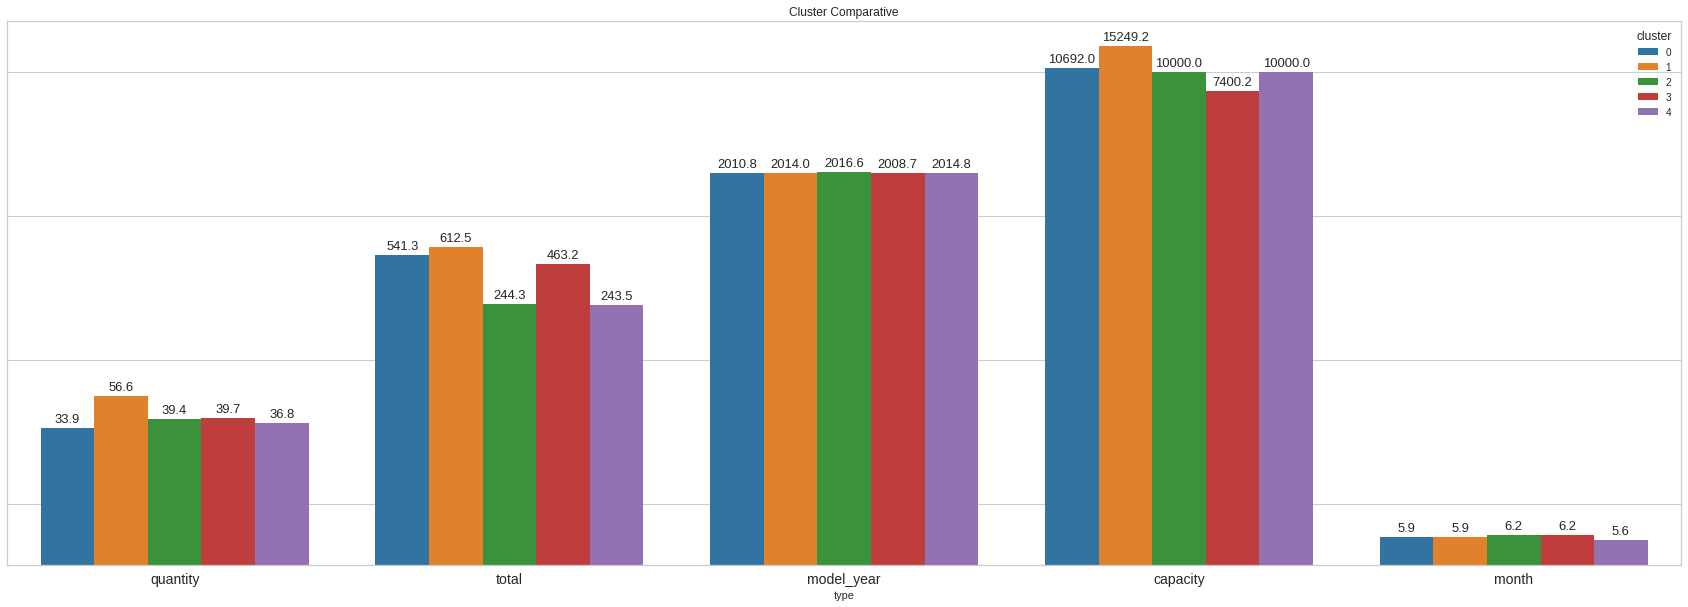

========== Cluster: 0 ========== 

==> branch_name: ['UNIPETRO - DO', 'UNIPETRO - TP', 'UNIPETRO - TL'] 
==> area_description: ['MANUTENCAO GERAL DO VEICULOS ', 'ACESSÓRIOS VEICULO ', 'MANUTENÇÃO ELÉTRICA '] 
==> supplier: ['UNIPETRO TUPA  DISTRIBUIDORA DE PETRÓLEO LTDA', 'J B FELIX EIRELI', 'ADEMIR TADEU LOPES'] 
==> tax_description: ['MANUTENÇÃO DE VEÍCULOS', 'COMBUSTIVEIS E LUBRIFICANTES', 'VIAGENS E ESTADIAS (+ ESTACIONAMENTO )'] 
==> product_description: ['MATERIAL MANUTENCAO VEICULOS', 'ONU 1202-OLEO DIESEL B S500 - CLASSE 3,', 'COMBUSTIVEL (GAS/ALC/DIESEL/ARLA/GAS EMPILHADEIRA)'] 
==> quantity: 34.0(media) 
==> total: 541.0(media) 
==> brand_name: ['VW', 'M.BENZ', 'FORD'] 
==> model: ['1718', 'VM 270', '17180'] 
==> vehicle_type: ['TOCO', 'TRUCK', 'CARRETA'] 
==> truck_type: ['TANQUE', 'CAVALO', 'TANQUE EM PRODUÇÃO'] 
==> department: ['OPERACIONAL'] 
==> model_year: 2011.0(media) 
==> capacity: 10692.0(media) 
==> aplication: ['ENTREGA DIESEL', 'ENTREGA ARLA', 'COMPRA DIESEL'] 


In [ ]:
# Option two
mean_grup = df.groupby('cluster').mean().reset_index().drop(columns=['document','tax_code','year','total_log','quantity_log','capacity_log'])

mean_grup_2 = mean_grup.melt('cluster',var_name='type',value_name='media')
plt.figure(figsize = (30,10))
g = sns.barplot(y = 'media',x='type', data=mean_grup_2,hue='cluster')
g.set_yscale("log")
plt.ylabel('')
plt.ylabel('')
g.set(yticklabels=[])
g.tick_params(axis='x', labelsize=14)
plt.title('Cluster Comparative')

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), fontsize=13,
               textcoords = 'offset points')
plt.show()

 ## MORE DETAILED ANALYSIS OF EACH CLUSTER, WITH THE EXACT VALUES
# IT IS NOT NECESSARY TO INSERT ALL COLUMNS, IT CAN BE CHANGED TO KEEP ONLY THE MOST IMPORTANT COLUMNS FOR AND FOCUSING ON THE BUSINESS
for g in df.cluster.value_counts().index: #unique():
  print("="*10,f"Cluster: {g}", "="*10,'\n')
  for c in df.columns: #['branch_name','quantity']:
    temp = df.query(f"cluster == {g}") #.groupby(['cluster']).count()
    if temp[c].dtype == 'O' and c not in ['license','date']:
      print(f"==> {c}: {temp[c].value_counts().index[:3].tolist() } ")

    elif c in ['quantity', 'total', 'model_year','capacity', 'month']:
      print(f"==> {c}: {np.round(temp[c].mean()) }(media) ")

  print()

#**Linear Regression**


In [ ]:
## FUNCTION TO ENCAPSULATE TRAINING AND INITIAL VALIDATION OF THE MODEL
def make_train_model(models, X_train,X_test,y_train,y_test):
  for model in models:
    print("="*5, model.__class__.__name__,"="*5)
    model_fit = model.fit(X_train,y_train)
    pred_train = model_fit.predict(X_train)

    ## VALIDATION TRAIN
    print("==> TRAIN VALIDATION")
    print('MSE : {}'.format(mean_squared_error(y_true = y_train, y_pred = pred_train)))
    print('R2 : {:.2f}%'.format(r2_score(y_true = y_train, y_pred = pred_train)*100 ))
    print()

    pred_test = model_fit.predict(X_test)
    print("==> TEST VALIDATION")
    print('MSE : {}'.format(mean_squared_error(y_true = y_test, y_pred = pred_test)))
    print('R2 : {:.2f}%'.format(r2_score(y_true = y_test, y_pred = pred_test)*100 ))
    print()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import seaborn as sns

##Data preparation
 - transform categorical columns
 - eliminate columns with high Nun values

In [ ]:
df = pd.read_csv("df_fleet_final.csv")
df.columns

Index(['branch_name', 'license', 'area_description', 'date', 'document',
       'supplier', 'tax_code', 'tax_description', 'product_description',
       'quantity', 'total', 'brand_name', 'model', 'vehicle_type',
       'truck_type', 'department', 'model_year', 'capacity', 'aplication',
       'afiliate_name', 'property_owner', 'year', 'month', 'total_log',
       'quantity_log', 'capacity_log'],
      dtype='object')

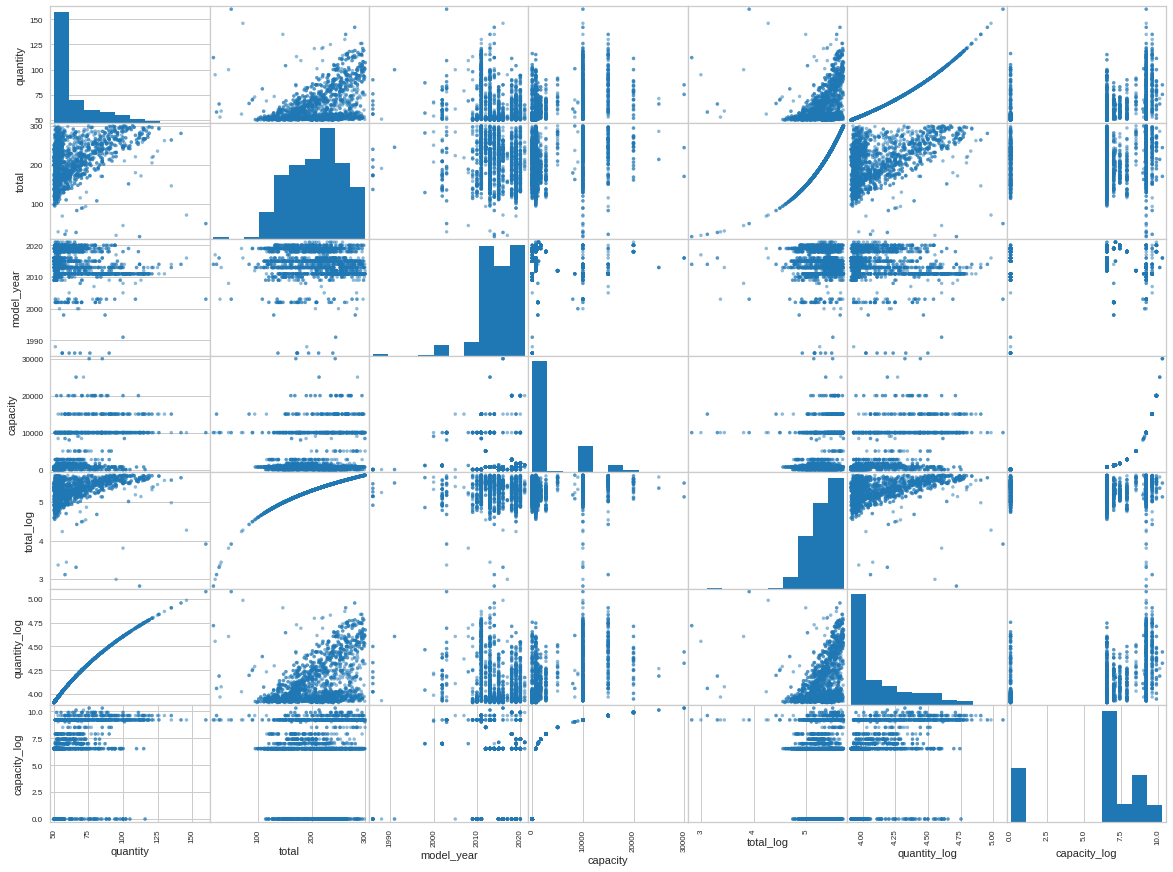

In [ ]:
pd.plotting.scatter_matrix(df.drop(columns=['document','tax_code','month','year']).query("quantity > 50 and total < 300 "), figsize=(20,15))
plt.show()

Regression Models

 - the objective of the models is to predict the amount spent (total) from other variables.
 - The following algorithms were tested: Decision Tree Regressor, Linear Regresseion and Ridge

##Simple Linear Regression
 - Variables:
   - total(y) and capacity(x)
   - total(y) and year_model(x)


In [ ]:
## MODEL EXECUTION 
## SPLITTING DATA IN TRAINING AND TESTING
X_train, X_test, y_train, y_test = train_test_split(df[['capacity']], df['total'], test_size= 0.2)

## CREATING LIST WITH TEMPLATES TO BE USED
model_list = [DecisionTreeRegressor(), LinearRegression(), Ridge()]

## RUNNING THE FUNCTION TO TRAIN AND VALIDATE THE MODEL
make_train_model(model_list,X_train,X_test,y_train,y_test)

===== DecisionTreeRegressor =====
==> TRAIN VALIDATION
MSE : 290640.27257559594
R2 : 7.85%

==> TEST VALIDATION
MSE : 277077.23318255536
R2 : 7.36%

===== LinearRegression =====
==> TRAIN VALIDATION
MSE : 296472.1613656692
R2 : 6.00%

==> TEST VALIDATION
MSE : 280538.718112309
R2 : 6.20%

===== Ridge =====
==> TRAIN VALIDATION
MSE : 296472.1613656692
R2 : 6.00%

==> TEST VALIDATION
MSE : 280538.71811230865
R2 : 6.20%



All cells below perform the same procedure as the cell above.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['model_year']], df['total'], test_size= 0.2)
model_list = [DecisionTreeRegressor(), LinearRegression(), Ridge()]
make_train_model(model_list,X_train,X_test,y_train,y_test)

===== DecisionTreeRegressor =====
==> TRAIN VALIDATION
MSE : 296729.97921184875
R2 : 3.48%

==> TEST VALIDATION
MSE : 319007.9881920847
R2 : 3.62%

===== LinearRegression =====
==> TRAIN VALIDATION
MSE : 303795.2641463633
R2 : 1.18%

==> TEST VALIDATION
MSE : 326623.60798482347
R2 : 1.32%

===== Ridge =====
==> TRAIN VALIDATION
MSE : 303795.2641463704
R2 : 1.18%

==> TEST VALIDATION
MSE : 326623.60894926253
R2 : 1.32%



##Simple linear regression with LOG columns

 - tota_log(y) and capacity_log(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['capacity_log']], df['total_log'], test_size= 0.2)
model_list = [DecisionTreeRegressor(), LinearRegression(), Ridge()]
make_train_model(model_list,X_train,X_test,y_train,y_test)

===== DecisionTreeRegressor =====
==> TRAIN VALIDATION
MSE : 1.298328938242682
R2 : 7.43%

==> TEST VALIDATION
MSE : 1.312557914568049
R2 : 6.73%

===== LinearRegression =====
==> TRAIN VALIDATION
MSE : 1.3778311668176457
R2 : 1.76%

==> TEST VALIDATION
MSE : 1.378971348525607
R2 : 2.01%

===== Ridge =====
==> TRAIN VALIDATION
MSE : 1.3778311668182113
R2 : 1.76%

==> TEST VALIDATION
MSE : 1.3789713634480838
R2 : 2.01%



In [ ]:
cluster_data = pd.DataFrame(MinMaxScaler().fit_transform(df[['quantity','total']]))
X_train, X_test, y_train, y_test = train_test_split(cluster_data.iloc[:,[0]], cluster_data.iloc[:,1], test_size= 0.2)
model_list = [DecisionTreeRegressor(), LinearRegression(), Ridge()]
make_train_model(model_list,X_train,X_test,y_train,y_test)

===== DecisionTreeRegressor =====
==> TRAIN VALIDATION
MSE : 0.021023578242506114
R2 : 17.71%

==> TEST VALIDATION
MSE : 0.02388589565519866
R2 : 6.61%

===== LinearRegression =====
==> TRAIN VALIDATION
MSE : 0.024990468244538055
R2 : 2.18%

==> TEST VALIDATION
MSE : 0.025332844211659586
R2 : 0.95%

===== Ridge =====
==> TRAIN VALIDATION
MSE : 0.02499046930505546
R2 : 2.18%

==> TEST VALIDATION
MSE : 0.025332458458106236
R2 : 0.95%



##Multiple Linear Regression
 
 - total(y) and capacity, model_year,branch_name, brand_name, vehicle type, truck_type, aplication
 

In [ ]:
## CONVERTING CATEGORY VALUES TO COLUMN  (dummies)
one = OneHotEncoder()
data_one = pd.DataFrame(one.fit_transform(df[['brand_name', 'vehicle_type', 'truck_type', 'department']]).toarray(),
                             columns=one.get_feature_names())
data_one = pd.concat([df[['total', 'capacity','quantity']],data_one],axis=1)
data_one.head()

,total,capacity,quantity,x0_BLAYA,x0_CHEVROLET,x0_CITROEN,x0_FIAT,x0_FORD,x0_GM,x0_HONDA,x0_HYUNDAI,x0_IVECO,x0_KIA,x0_KRONORTE,x0_LIBRELATO,x0_M.BENZ,x0_MB,x0_MITISUBISHI,x0_MITSUBISHI,x0_NOMA,x0_PEUGEOT,x0_RANDON,x0_RECROSUL,x0_RENAULT,x0_SCANIA,x0_SUNDOW,x0_TOYOTA,x0_UP,x0_VOLVO,x0_VW,x1_BI TRUCK,x1_CAMIONETE,x1_CARRETA,x1_CAVALO,x1_FURGÃO,x1_HR,x1_MOTO,x1_PASSEIO,x1_PICK UP,x1_TANQUE,x1_TOCO,x1_TRUCK,x2_ABERTA,x2_BAÚ,x2_CAVALO,x2_CAÇAMBA,x2_FURGÃO,x2_SIDER,x2_TANQUE,x2_TANQUE EM PRODUÇÃO,x3_ADM,x3_COMERCIAL,x3_DIRETORIA,x3_OPERACIONAL
0,320.40,0.0,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,133.51,0.0,33.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,286.36,693.0,94.415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70.00,693.0,25.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,150.96,693.0,47.190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x = data_one.drop(columns=['total'])
y = data_one.total
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model_list = [DecisionTreeRegressor(), LinearRegression(), Ridge()]
make_train_model(model_list,X_train,X_test,y_train,y_test)

===== DecisionTreeRegressor =====
==> TRAIN VALIDATION
MSE : 162558.8352744977
R2 : 47.54%

==> TEST VALIDATION
MSE : 284935.13970042753
R2 : 11.28%

===== LinearRegression =====
==> TRAIN VALIDATION
MSE : 274282.1393927611
R2 : 11.49%

==> TEST VALIDATION
MSE : 287261.74791667523
R2 : 10.56%

===== Ridge =====
==> TRAIN VALIDATION
MSE : 274290.86216584535
R2 : 11.49%

==> TEST VALIDATION
MSE : 287223.1930901396
R2 : 10.57%

